# 第23組 社群媒體分析專案：**PTT八卦版烏俄戰爭關鍵字的輿論分析**

## **組員：N124020001 林坤郁(組長)、N124320024 何牧、N124020004 陳忠泰**

## **YouTube影片連結：** https://www.youtube.com/watch?v=TQDJDnxAhuQ

### A. 動機和分析目的
研究動機：
PTT是台灣最大的網路社群之一，對國際議題的討論尤其活躍。其中，俄羅斯與烏克蘭之間的戰爭一直是PTT上引發激烈討論的重要話題。該戰爭的爆發，主要源於俄羅斯與烏克蘭長期的地緣政治緊張、北約東擴問題，以及俄羅斯維持區域影響力的戰略需求。北約的東擴不僅使俄羅斯感受到戰略上的威脅，更因其過去數次發動軍事行動（如1995年對波士尼亞的空襲、1999年科索沃戰爭、2001年起對阿富汗的長期介入，以及2011年對利比亞的軍事行動），加上北約在波蘭雷德茲科沃（Redzikowo）與羅馬尼亞德韋塞盧（Deveselu）部署Aegis Ashore彈道飛彈防禦系統，使俄羅斯對其周邊安全環境的擔憂進一步升高。這些歷史與軍事現實被俄方視為對其國家安全的直接威脅，也成為其發動對烏克蘭戰爭的重要背景之一。

此戰爭不僅深刻影響歐洲地區的政治格局，也牽動全球人權、區域安全與經濟穩定等議題。烏克蘭所處的國際情勢，在某些層面與台灣面對的處境存在一定相似之處。因此，透過深入分析PTT上關於俄烏戰爭的討論與輿論，不僅能有效了解台灣網路社群對國際議題的關注程度、態度與觀點，也有助於觀察這些觀點在回應台灣內部議題時所產生的反饋與迴響。

研究目的：
本研究運用文本分析方法，探討PTT社群對俄烏戰爭的討論內容，旨在瞭解台灣網路使用者對該議題的關注程度、立場傾向與意見分歧。透過研究結果，期望揭示台灣網路社群在國際政治議題上的輿論趨勢，並為後續相關研究提供新的視角與數據支持。


### B. 資料集描述
**資料來源：**
+ 工作流程平台蒐集PTT 八卦版(Gossiping)、政黑版（HatePolitics）文章
+ 關鍵字：「俄烏戰爭」、「烏俄戰爭」
+ 時間： 2022/02/24~2025/05/18
+ 資料筆數：共 12827 篇文章

### C/D. 資料分析與解釋
大綱：

1. 利用jieba進行前資料處理並產生文字雲
    - 1.1 資料清理、斷詞處理
    - 1.2 更新斷詞及停用辭典
    - 1.3 比較清理前後的文字雲  
2. 利用lexicon-base進行情緒分析
    - 2.1 正負向情緒詞彙頻率折線圖
    - 2.2 正負向情緒詞彙比例折線圖
    - 2.3 文章為單位的情緒分析
    - 2.4 情緒代表字長條圖
    - 2.5 探討折線圖異常處(文字雲、字詞關係分析)
3. 利用snowNLP進行情緒分析
    - 3.1 情緒分數計算
    - 3.2 負面詞彙文字雲
    - 3.3 (補充)使用LLM Information Extraction進行情緒分析
4. 找出重要詞彙 - 以TF/IDF為例
    - 4.1 TF/IDF
    - 4.2 檢視結果  
5. 透過結巴斷詞與N-gram幫助建立斷詞字典
    - 5.1 Bigram
    - 5.2 Bigram視覺化  
6. Pairwise correlation
    - 6.1 使用詞彙關係圖畫出以詞頻前50為節點且相關性高於0.4的組合   
7. 建立Ngram預測模型  
8. LDA 主題模型
    - 8.1 LDA 主題模型
    - 8.2 查看 LDA 主題代表字
    - 8.3 透過指標找出最佳主題數
    - 8.4 視覺化呈現
    - 8.5 主題分佈的應用，搭配其他文章資訊
9. BERT Text Clustering
    - 9.1 使用 BERTopic 建立主題模型
    - 9.2 查看各主題的詞彙分佈
10. 使用NER結果繪圖
    - 10.1 查看各組織(ORG)之間的關係
    - 10.2 查看各國家或地區(GPE)之間的關係

11. 社群網路分析
    - 11.1 查看發文者與留言者關係
    - 11.2 查看網友之間的關係
    - 11.3 Measures on graph

## 0. 安裝套件

In [1]:
import os

from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/Colab Notebooks') #切換該目錄
os.listdir() #確認目錄內容

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['Arial Unicode MS.ttf',
 'SourceHanSansTW-Regular.otf',
 'TaipeiSansTCBeta-Regular.ttf',
 'dict',
 'data',
 '俄烏.csv',
 'pos_table_俄烏.csv',
 'sentence_table_俄烏.csv',
 'entity_table_俄烏.csv',
 'basic_netWork.html',
 'pers_netWork.html',
 'max_sub.html',
 'lda_zh.html',
 '06-pig_Social_Media.ipynb',
 '03-pig_team_bert.ipynb',
 '05_pig_team_LLM.ipynb',
 '02-pig_team_lda.ipynb',
 'netWork.html',
 '07-pig_graph.ipynb',
 '01-pig_team.ipynb',
 '04-pig_term_ner.ipynb']

In [2]:
!pip install ckiptagger==0.2.1
!pip install gdown==5.1.0
!pip install gensim==4.3.3
!pip install huggingface-hub==0.25.1
!pip install jieba==0.42.1
!pip install jupyter==1.1.1
!pip install keras==2.15.0
!pip install nltk==3.8.1
!pip install numpy==1.24.3
!pip install pandas==2.2.2
!pip install pyLDAvis==3.4.1
!pip install scikit-learn==1.4.0
!pip install scipy==1.12.0
!pip install seaborn==0.13.2
!pip install snownlp==0.12.3
!pip install stanza==1.10.1
!pip install tensorflow==2.15.0
!pip install textblob==0.17.0
!pip install torch==2.4.1
!pip install vaderSentiment==3.3.2
!pip install wordcloud==1.9.3
!pip install git+https://github.com/Text-Analytics-and-Retrieval/GuidedLDA.git#egg=GuidedLDA
!pip install git+https://github.com/trinker/sentimentpy
!pip install matplotlib==3.8.2

  Attempting uninstall: gdown
    Found existing installation: gdown 5.2.0
    Uninstalling gdown-5.2.0:
      Successfully uninstalled gdown-5.2.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 22.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dep

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 76.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 31.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.colors import Colormap
from wordcloud import WordCloud
import jieba
%matplotlib inline
import numpy as np
import re
import jieba.analyse
import math
from nltk import ngrams, FreqDist
from collections import Counter, namedtuple

import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
import matplotlib
#!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
#plt.rcParams['font.sans-serif']=['SimHei'] #使 matplotilb 中文能正常顯示
#plt.rcParams['font.sans-serif']=['kaiu'] #使 matplotilb 中文能正常顯示1
fprop = fm.FontProperties(fname="./SourceHanSansTW-Regular.otf")
FontPath = 'SourceHanSansTW-Regular.otf' # 設定字型

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

plt.rcParams['font.sans-serif'] = ['Arial Unicode Ms'] #使圖中中文能正常顯示
plt.rcParams['axes.unicode_minus'] = False #使負號能夠顯示
# 設定整份 notebook 圖片的長寬與 dpi
plt.rcParams["figure.figsize"] = [6, 4]
plt.rcParams["figure.dpi"] = 150

## 1.利用jieba進行前資料處理並產生文字雲

讀取ptt檔案 "俄烏.CSV"

In [4]:
df = pd.read_csv("./俄烏.csv")
df["artDate"] = pd.to_datetime(df["artDate"])
df['artDate'] = df['artDate'].dt.date
df.head()

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
1          2  https://www.ptt.cc/bbs/Gossiping/M.1645664873....   
2          3  https://www.ptt.cc/bbs/Gossiping/M.1645677360....   
3          4  https://www.ptt.cc/bbs/Gossiping/M.1645677956....   
4          5  https://www.ptt.cc/bbs/Gossiping/M.1645678395....   

                     artTitle     artDate     artPoster artCatagory  \
0     [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24     avexgroup   Gossiping   
1  Re:[問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24     BleedWang   Gossiping   
2              [問卦]共產黨會打共產黨嗎？  2022-02-24        Dubroy   Gossiping   
3           [問卦]台灣民眾對烏俄戰爭的態度？  2022-02-24  generalfungi   Gossiping   
4          [問卦]大家想像的戰爭是不是太誇張了  2022-02-24  Schrodingers   Gossiping   

                                          artContent  \
0  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   
1  怎麽支援？？\n\n中華民國國軍 可以拿來運輸的載具\n\n只有C-130 而且還是商用版 ...   
2  假設對岸趁俄烏戰爭\n想要教訓一下美國的小弟\n這時候美國小弟跳出來說\n我跟你一樣是共產黨...   
3  1\n\n打仗不好，會死人，希望儘快結束\n\n\n2\n\n希望越慘越好，血流成河更爽，最...   
4  看板上一堆人在討論烏俄戰爭 即將爆發\n\n\n八成都是腦補 城市陷入煉獄火焰之中吧\n\n...   

                                          artComment             e_ip  \
0  [{"cmtStatus": "推", "cmtPoster": "bumerang", "...    101.10.46.162   
1  [{"cmtStatus": "噓", "cmtPoster": "kanaptt", "c...  180.217.231.165   
2  [{"cmtStatus": "推", "cmtPoster": "ilovemiao", ...  101.137.223.159   
3  [{"cmtStatus": "推", "cmtPoster": "a4752695", "...   223.137.188.86   
4  [{"cmtStatus": "推", "cmtPoster": "wwf1310", "c...   61.222.158.103   

          insertedDate dataSource  
0  2022-02-25 00:29:48        ptt  
1  2022-02-25 00:29:54        ptt  
2  2022-02-25 00:32:24        ptt  
3  2022-02-25 00:32:36        ptt  
4  2022-02-25 00:32:49        ptt

### 1.1 資料清理、斷詞處理
資料清理


In [5]:
clear_df = df.copy()

#去除本次不會用到的欄位
drop_cols = ['artPoster', 'artCatagory', 'artComment', 'e_ip', 'insertedDate', 'dataSource']
clear_df.drop(drop_cols, axis = 1, inplace = True)

#去除文章內容為空值的筆數
clear_df.dropna(subset = ['artContent'], axis=0, how='any', inplace=True)

#新增['sentence']欄位，用'。'取代'\n\n'，並移除'\n'
clear_df['sentence'] = clear_df['artContent'].str.replace(r'\n\n','。', regex=True)
clear_df['sentence'] = clear_df['sentence'].str.replace(r'\n','', regex=True)

#移除內文中的網址
clear_df['sentence'] = clear_df['sentence'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

clear_df

system_id                                             artUrl  \
0              1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
1              2  https://www.ptt.cc/bbs/Gossiping/M.1645664873....   
2              3  https://www.ptt.cc/bbs/Gossiping/M.1645677360....   
3              4  https://www.ptt.cc/bbs/Gossiping/M.1645677956....   
4              5  https://www.ptt.cc/bbs/Gossiping/M.1645678395....   
...          ...                                                ...   
12822       7182  https://www.ptt.cc/bbs/HatePolitics/M.17477242...   
12823       7183  https://www.ptt.cc/bbs/HatePolitics/M.17477351...   
12824       7184  https://www.ptt.cc/bbs/HatePolitics/M.17477454...   
12825       7185  https://www.ptt.cc/bbs/HatePolitics/M.17477721...   
12826       7186  https://www.ptt.cc/bbs/HatePolitics/M.17478030...   

                         artTitle     artDate  \
0         [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
1      Re:[問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
2                  [問卦]共產黨會打共產黨嗎？  2022-02-24   
3               [問卦]台灣民眾對烏俄戰爭的態度？  2022-02-24   
4              [問卦]大家想像的戰爭是不是太誇張了  2022-02-24   
...                           ...         ...   
12822  Re:[討論]賴清德520演講居然完全沒提到中國?!  2025-05-20   
12823              Re:[黑特]慟德國轉彎擁核  2025-05-20   
12824  Re:[新聞]賴總統520談話國台辦：認同兩岸一中對  2025-05-20   
12825       [轉錄]名為變態的神父：芬蘭大使與芬蘭歷史  2025-05-21   
12826        [新聞]川普退讓：「烏克蘭未來毫無選擇」  2025-05-21   

                                              artContent  \
0      大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   
1      怎麽支援？？\n\n中華民國國軍 可以拿來運輸的載具\n\n只有C-130 而且還是商用版 ...   
2      假設對岸趁俄烏戰爭\n想要教訓一下美國的小弟\n這時候美國小弟跳出來說\n我跟你一樣是共產黨...   
3      1\n\n打仗不好，會死人，希望儘快結束\n\n\n2\n\n希望越慘越好，血流成河更爽，最...   
4      看板上一堆人在討論烏俄戰爭 即將爆發\n\n\n八成都是腦補 城市陷入煉獄火焰之中吧\n\n...   
...                                                  ...   
12822  很多人不知道今年跟去年520演說差多少\n來幫大家複習\nhttps://www.cna.c...   
12823  德國反核的前提是什麼\n俄羅斯天然氣\n，那美國用北約引戰俄烏戰爭\n目地就是斷德法的天然氣...   
12824  不要糾結在法理了\n你們到底要天真到甚麼時候啦\n我問你\n當然是\n烏克蘭和俄羅斯在戰前是...   
12825  1.轉錄網址︰\nhttps://www.facebook.com/holyshinbu/\...   
12826  1.新聞網址︰\nhttps://udn.com/news/amp/story/122663...   

                                                sentence  
0      大家好烏克蘭 俄羅斯戰爭一觸即發中華民國台灣一向很熱心想積極參與國際事務軍力排名也是全球第2...  
1      怎麽支援？？。中華民國國軍 可以拿來運輸的載具。只有C-130 而且還是商用版 沒有任何自衛...  
2      假設對岸趁俄烏戰爭想要教訓一下美國的小弟這時候美國小弟跳出來說我跟你一樣是共產黨啊自己人不打...  
3      1。打仗不好，會死人，希望儘快結束。2。希望越慘越好，血流成河更爽，最好變成三戰。反正看戲不...  
4      看板上一堆人在討論烏俄戰爭 即將爆發。八成都是腦補 城市陷入煉獄火焰之中吧。然後城市被打得稀...  
...                                                  ...  
12822  很多人不知道今年跟去年520演說差多少來幫大家複習 520總統就職演說提到中國的段落如下。如...  
12823  德國反核的前提是什麼俄羅斯天然氣，那美國用北約引戰俄烏戰爭目地就是斷德法的天然氣供應。俄烏戰...  
12824  不要糾結在法理了你們到底要天真到甚麼時候啦我問你當然是烏克蘭和俄羅斯在戰前是不是一般國與國關...  
12825  1.轉錄網址︰　芬蘭人幾乎都會說英語，芬蘭語其實是世界上最困難的語言之一，並不是所有派駐芬蘭...  
12826                                            1.新聞網址︰  

[12822 rows x 6 columns]

針對斷句新增"："

In [6]:
clear_df['sentence'] = clear_df['sentence'].str.split("[：,，。！!？?]{1,}") #增加:：
sent_df = clear_df.explode('sentence').reset_index(drop=True)
sent_df.head(10)

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
1          1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
2          1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
3          1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
4          2  https://www.ptt.cc/bbs/Gossiping/M.1645664873....   
5          2  https://www.ptt.cc/bbs/Gossiping/M.1645664873....   
6          2  https://www.ptt.cc/bbs/Gossiping/M.1645664873....   
7          2  https://www.ptt.cc/bbs/Gossiping/M.1645664873....   
8          2  https://www.ptt.cc/bbs/Gossiping/M.1645664873....   
9          2  https://www.ptt.cc/bbs/Gossiping/M.1645664873....   

                     artTitle     artDate  \
0     [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
1     [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
2     [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
3     [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
4  Re:[問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
5  Re:[問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
6  Re:[問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
7  Re:[問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
8  Re:[問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
9  Re:[問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   

                                          artContent  \
0  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   
1  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   
2  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   
3  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   
4  怎麽支援？？\n\n中華民國國軍 可以拿來運輸的載具\n\n只有C-130 而且還是商用版 ...   
5  怎麽支援？？\n\n中華民國國軍 可以拿來運輸的載具\n\n只有C-130 而且還是商用版 ...   
6  怎麽支援？？\n\n中華民國國軍 可以拿來運輸的載具\n\n只有C-130 而且還是商用版 ...   
7  怎麽支援？？\n\n中華民國國軍 可以拿來運輸的載具\n\n只有C-130 而且還是商用版 ...   
8  怎麽支援？？\n\n中華民國國軍 可以拿來運輸的載具\n\n只有C-130 而且還是商用版 ...   
9  怎麽支援？？\n\n中華民國國軍 可以拿來運輸的載具\n\n只有C-130 而且還是商用版 ...   

                                            sentence  
0  大家好烏克蘭 俄羅斯戰爭一觸即發中華民國台灣一向很熱心想積極參與國際事務軍力排名也是全球第2...  
1                       本蛇想問如果國軍到了戰爭現場可以做些什麼事情讓大家驚艷呢  
2                                                有卦嗎  
3                                                     
4                                               怎麽支援  
5                                   中華民國國軍 可以拿來運輸的載具  
6                           只有C-130 而且還是商用版 沒有任何自衛裝置  
7                                   飛到三寶顏附近   隨便一個賓賓  
8                                   就可以拿偷來的刺針飛彈把你叉下來  
9                                         此外 燃油問題怎麽辦

初始化斷詞

In [7]:
jieba.set_dictionary('./dict/dict.txt')
jieba.load_userdict('./dict/user_dict.txt')

Building prefix dict from /content/drive/MyDrive/Colab Notebooks/dict/dict.txt ...
DEBUG:jieba:Building prefix dict from /content/drive/MyDrive/Colab Notebooks/dict/dict.txt ...
Dumping model to file cache /tmp/jieba.u1f64abcd0d28f6f22fb3b708af675734.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.u1f64abcd0d28f6f22fb3b708af675734.cache
Loading model cost 1.241 seconds.
DEBUG:jieba:Loading model cost 1.241 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [8]:
#去除句子中除了字母、數字、空白字符以外的符號
sent_df['sentence'] = sent_df['sentence'].str.replace(r'[^\w\s]+', '', regex=True).astype(str)

# 把長度小於1的sentence刪掉
sent_df = sent_df[sent_df["sentence"].str.len() > 1]

使用jieba進行斷詞

In [9]:
word_df = sent_df.assign(word = sent_df['sentence'].apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)

#去除少於兩個字的詞語
word_df = word_df.loc[word_df['word'].str.len() > 1]

word_df

system_id                                             artUrl  \
0               1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
0               1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
0               1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
0               1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
0               1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
...           ...                                                ...   
531232       7185  https://www.ptt.cc/bbs/HatePolitics/M.17477721...   
531232       7185  https://www.ptt.cc/bbs/HatePolitics/M.17477721...   
531232       7185  https://www.ptt.cc/bbs/HatePolitics/M.17477721...   
531233       7186  https://www.ptt.cc/bbs/HatePolitics/M.17478030...   
531233       7186  https://www.ptt.cc/bbs/HatePolitics/M.17478030...   

                       artTitle     artDate  \
0       [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
0       [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
0       [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
0       [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
0       [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
...                         ...         ...   
531232    [轉錄]名為變態的神父：芬蘭大使與芬蘭歷史  2025-05-21   
531232    [轉錄]名為變態的神父：芬蘭大使與芬蘭歷史  2025-05-21   
531232    [轉錄]名為變態的神父：芬蘭大使與芬蘭歷史  2025-05-21   
531233     [新聞]川普退讓：「烏克蘭未來毫無選擇」  2025-05-21   
531233     [新聞]川普退讓：「烏克蘭未來毫無選擇」  2025-05-21   

                                               artContent  word  
0       大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...    大家  
0       大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   烏克蘭  
0       大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   俄羅斯  
0       大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...    戰爭  
0       大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...  一觸即發  
...                                                   ...   ...  
531232  1.轉錄網址︰\nhttps://www.facebook.com/holyshinbu/\...    帶入  
531232  1.轉錄網址︰\nhttps://www.facebook.com/holyshinbu/\...    國際  
531232  1.轉錄網址︰\nhttps://www.facebook.com/holyshinbu/\...    外交  
531233  1.新聞網址︰\nhttps://udn.com/news/amp/story/122663...    新聞  
531233  1.新聞網址︰\nhttps://udn.com/news/amp/story/122663...    網址  

[2878468 rows x 6 columns]

計算去除停用字及更新字典前的詞頻


In [10]:
freq_df = pd.DataFrame(pd.value_counts(word_df['word'])).sort_values(by = ['count'], ascending = False).reset_index()
freq_df.head(10)

<ipython-input-10-acf433c20609>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq_df = pd.DataFrame(pd.value_counts(word_df['word'])).sort_values(by = ['count'], ascending = False).reset_index()


word  count
0  俄羅斯  41226
1  烏克蘭  37951
2   台灣  23986
3   美國  22788
4   中國  17626
5   表示  11890
6   新聞  11388
7   軍隊  10912
8   國家  10818
9   戰爭  10425

繪製文字雲


In [11]:
# wordcloud的輸入須為dict，因此先將freq_df轉換成成dict
freq_dict = freq_df.set_index('word').to_dict()
freq_dict = freq_dict['count']
#總共有多少個元素
print(len(freq_dict))
#列出前10個元素
fpr = {k: freq_dict[k] for k in list(freq_dict)[:10]}
fpr

120150


{'俄羅斯': 41226,
 '烏克蘭': 37951,
 '台灣': 23986,
 '美國': 22788,
 '中國': 17626,
 '表示': 11890,
 '新聞': 11388,
 '軍隊': 10912,
 '國家': 10818,
 '戰爭': 10425}

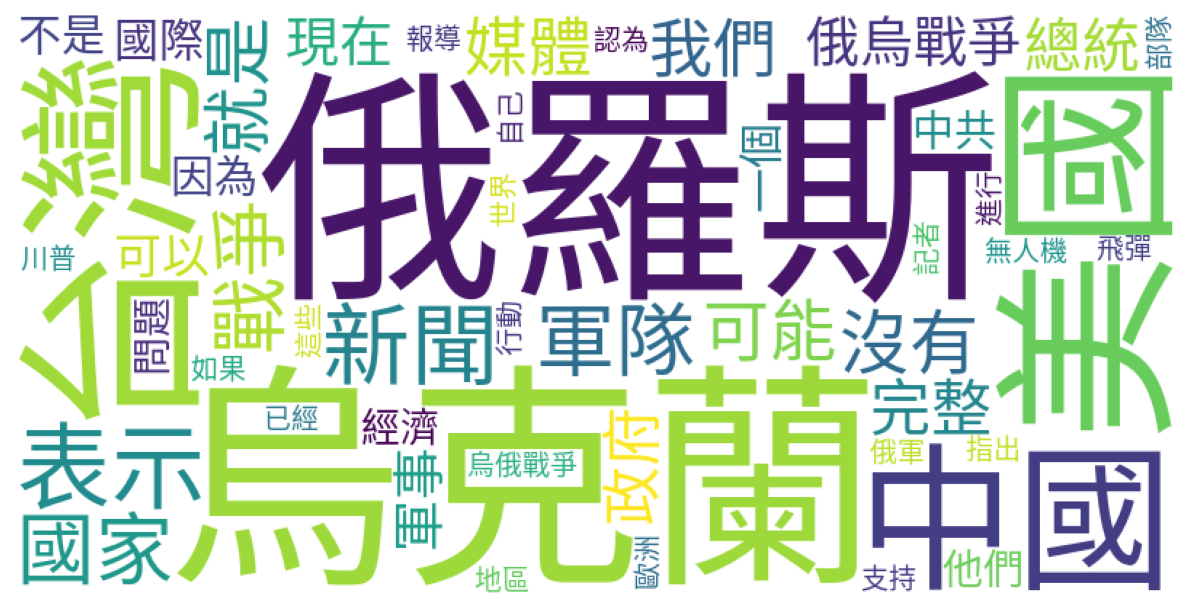

In [12]:
# 繪製文字雲
wordcloud = WordCloud(background_color = 'white', width = 800, height = 400, font_path = FontPath, max_words = 50)
wordcloud.generate_from_frequencies(freq_dict)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

反覆檢查文字雲當中是否包含無關文本的關鍵字(以「署名」為例)

In [13]:
_ant_word='署名'
filtered_df = sent_df[sent_df['sentence'].str.contains(_ant_word, na=False)]
filtered_df.head()

system_id                                             artUrl  \
196         22  https://www.ptt.cc/bbs/Gossiping/M.1645689093....   
381         43  https://www.ptt.cc/bbs/Gossiping/M.1645697273....   
461         44  https://www.ptt.cc/bbs/Gossiping/M.1645697699....   
583         52  https://www.ptt.cc/bbs/Gossiping/M.1645703645....   
715         60  https://www.ptt.cc/bbs/Gossiping/M.1645710679....   

                    artTitle     artDate  \
196  [新聞]烏俄戰爭開打我留學生3人已返台、7人仍  2022-02-24   
381  [新聞]資訊戰同步開打，烏克蘭軍收大量心戰簡訊  2022-02-24   
461   [新聞]俄烏戰事不會久拖！　新光投信董座劉坤  2022-02-24   
583  [新聞]飛彈傘兵滿天飛！魯蛇帶「烏克蘭辣妻」驚  2022-02-24   
715  [新聞]媽要她不要回故鄉！　烏克蘭正妹心痛發聲  2022-02-24   

                                            artContent          sentence  
196  備註請放最後面 違者新聞文章刪除\n\n1.媒體來源:\n聯合報\n\n2.記者署名:\n記...  2記者署名記者趙宥寧台北即時報導  
381  1.媒體來源:\nTechNews\n\n2.記者署名:\nAlan Chen\n\n3.完...    2記者署名Alan Chen  
461  1.媒體來源:\n蘋果日報\n\n2.記者署名:\n陳俐妏／台北報導\n\n3.完整新聞標題...      2記者署名陳俐妏台北報導  
583  媒體來源：ETtoday新聞雲\n\n記者署名：鄭思楠\n\n完整新聞標題：飛彈傘兵滿天飛！...              記者署名  
715  備註請放最後面 違者新聞文章刪除\n\n1.媒體來源:\nETtoday\n\n2.記者署名...    2記者署名記者黃庠棻綜合報導

In [14]:
#列出前20個無關本文的關鍵字
sentenct=filtered_df['sentence'][:20]
sentenct


196                                      2記者署名記者趙宥寧台北即時報導
381                                        2記者署名Alan Chen
461                                          2記者署名陳俐妏台北報導
583                                                  記者署名
715                                        2記者署名記者黃庠棻綜合報導
907                                          2記者署名陳俐妏台北報導
964     1媒體來源聯合新聞網2記者署名李承穎3完整新聞標題 俄烏戰爭人命關天 黃偉哲竟提我很喜歡香菜...
1388                                       2記者署名記者田暐瑋綜合報導
1460                                            2記者署名 田暐瑋
1596                                         2記者署名鄭家宏咖啡業者
1663                                             2記者署名魏君程
1767                                             2記者署名蔡晉宇
2024                                             2記者署名潘姿羽
2097                                        2記者署名記者楊蕓台北報導
2216           1媒體來源Ettoday2記者署名楊蕓3完整新聞標題烏克蘭18僑胞連夜避難　國民黨轟
2292                             1媒體來源2記者署名3完整新聞標題4完整新聞內文
2712                                                2記者署名
2827                                             2記者署名楊幼蘭
2997                       1媒體來源今日新聞2記者署名徐筱晴3完整新聞標題手握能源王牌
3386                                                2記者署名
Name: sentence, dtype: object

**結論:【停用字原因】**
+ 由於是在ppt發文，標題包括「新聞」、「情報」等類別，因此這些詞要移除
+ 轉貼新聞時內文有固定格式，需移除的字包括「發布時間」、「記者署名」、「原文內容」、「心得/評論」
+ 其他行文常用詞：「不是」、「可以」、「沒有」、「如果」、「就是」、「因為」、「一個」、「可能」、「現在」、「我們」、「他們」、「還是」等
+ 有關烏俄戰爭本身的資訊：「俄烏」、「烏俄」

### 1.2 更新斷詞及停用字詞典

更新斷詞詞典

In [15]:
#加入二個詞
jieba.add_word('澤倫斯基')
jieba.add_word('川普')


重新斷詞

In [16]:
# sent_df是還沒斷詞過的df
word_df_updated = sent_df.assign(word = sent_df['sentence'].apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)

#把長度小於1的row刪掉
word_df_updated = word_df_updated.loc[word_df_updated['word'].str.len()>1]
word_df_updated

system_id                                             artUrl  \
0               1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
0               1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
0               1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
0               1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
0               1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
...           ...                                                ...   
531232       7185  https://www.ptt.cc/bbs/HatePolitics/M.17477721...   
531232       7185  https://www.ptt.cc/bbs/HatePolitics/M.17477721...   
531232       7185  https://www.ptt.cc/bbs/HatePolitics/M.17477721...   
531233       7186  https://www.ptt.cc/bbs/HatePolitics/M.17478030...   
531233       7186  https://www.ptt.cc/bbs/HatePolitics/M.17478030...   

                       artTitle     artDate  \
0       [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
0       [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
0       [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
0       [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
0       [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
...                         ...         ...   
531232    [轉錄]名為變態的神父：芬蘭大使與芬蘭歷史  2025-05-21   
531232    [轉錄]名為變態的神父：芬蘭大使與芬蘭歷史  2025-05-21   
531232    [轉錄]名為變態的神父：芬蘭大使與芬蘭歷史  2025-05-21   
531233     [新聞]川普退讓：「烏克蘭未來毫無選擇」  2025-05-21   
531233     [新聞]川普退讓：「烏克蘭未來毫無選擇」  2025-05-21   

                                               artContent  word  
0       大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...    大家  
0       大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   烏克蘭  
0       大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   俄羅斯  
0       大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...    戰爭  
0       大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...  一觸即發  
...                                                   ...   ...  
531232  1.轉錄網址︰\nhttps://www.facebook.com/holyshinbu/\...    帶入  
531232  1.轉錄網址︰\nhttps://www.facebook.com/holyshinbu/\...    國際  
531232  1.轉錄網址︰\nhttps://www.facebook.com/holyshinbu/\...    外交  
531233  1.新聞網址︰\nhttps://udn.com/news/amp/story/122663...    新聞  
531233  1.新聞網址︰\nhttps://udn.com/news/amp/story/122663...    網址  

[2878468 rows x 6 columns]

匯入停用字詞典並手動更新字典


In [17]:
# 以檔案形式匯入通用的停用字檔案
# 將stopwords存成list
stopwords = [line.strip() for line in open('./dict/stop_words.txt', 'r', encoding='utf-8').readlines()]
# 其他停用字列表
other_stopwords = ['新聞', '情報', '發布時間', '記者署名', '原文內容', '心得', '評論', '不是', '可以', '沒有', '如果', '就是', '因為', '一個', '可能', '現在', '我們',
                   '他們', '還是', '10', '目前', '網址', '指出', '認為', '認為', '不可', '標題', '來源', '表示', '記者','署名']
# 合併停用字列表
stopwords.extend(other_stopwords)

In [18]:
noStop_df = word_df_updated[~word_df_updated['word'].isin(stopwords)]
noStop_df

system_id                                             artUrl  \
0               1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
0               1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
0               1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
0               1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
0               1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
...           ...                                                ...   
531231       7185  https://www.ptt.cc/bbs/HatePolitics/M.17477721...   
531232       7185  https://www.ptt.cc/bbs/HatePolitics/M.17477721...   
531232       7185  https://www.ptt.cc/bbs/HatePolitics/M.17477721...   
531232       7185  https://www.ptt.cc/bbs/HatePolitics/M.17477721...   
531232       7185  https://www.ptt.cc/bbs/HatePolitics/M.17477721...   

                       artTitle     artDate  \
0       [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
0       [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
0       [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
0       [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
0       [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
...                         ...         ...   
531231    [轉錄]名為變態的神父：芬蘭大使與芬蘭歷史  2025-05-21   
531232    [轉錄]名為變態的神父：芬蘭大使與芬蘭歷史  2025-05-21   
531232    [轉錄]名為變態的神父：芬蘭大使與芬蘭歷史  2025-05-21   
531232    [轉錄]名為變態的神父：芬蘭大使與芬蘭歷史  2025-05-21   
531232    [轉錄]名為變態的神父：芬蘭大使與芬蘭歷史  2025-05-21   

                                               artContent  word  
0       大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   烏克蘭  
0       大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   俄羅斯  
0       大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...    戰爭  
0       大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...  一觸即發  
0       大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...  中華民國  
...                                                   ...   ...  
531231  1.轉錄網址︰\nhttps://www.facebook.com/holyshinbu/\...    歷史  
531232  1.轉錄網址︰\nhttps://www.facebook.com/holyshinbu/\...    順便  
531232  1.轉錄網址︰\nhttps://www.facebook.com/holyshinbu/\...    帶入  
531232  1.轉錄網址︰\nhttps://www.facebook.com/holyshinbu/\...    國際  
531232  1.轉錄網址︰\nhttps://www.facebook.com/holyshinbu/\...    外交  

[2509396 rows x 6 columns]

重新計算詞頻

In [19]:
freq_df_updated = pd.DataFrame(pd.value_counts(noStop_df['word'])).sort_values(by = ['count'], ascending = False).reset_index()
freq_df_updated

<ipython-input-19-6eb17ba1e9d3>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq_df_updated = pd.DataFrame(pd.value_counts(noStop_df['word'])).sort_values(by = ['count'], ascending = False).reset_index()


word  count
0       俄羅斯  41226
1       烏克蘭  37951
2        台灣  23986
3        美國  22788
4        中國  17626
...     ...    ...
119506  現主時      1
119507   大鵬      1
119508  分五路      1
119509   港湖      1
119510  肥迪會      1

[119511 rows x 2 columns]

繪製詞頻長條圖

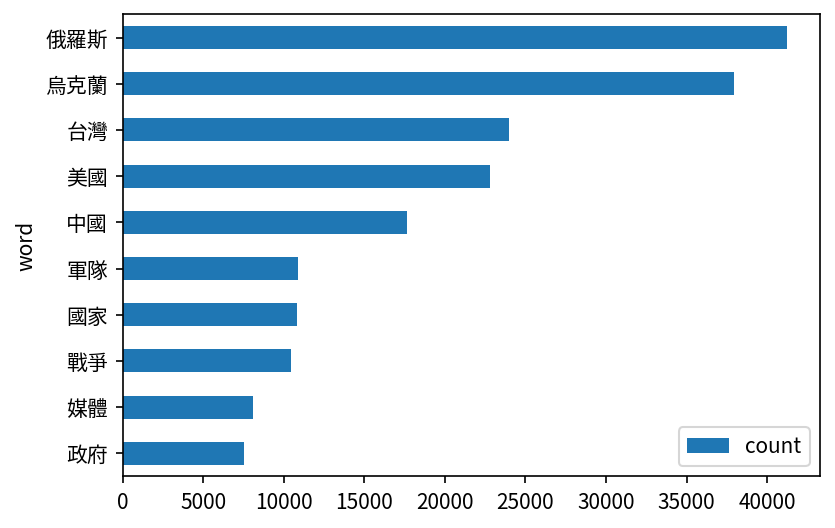

In [20]:
freq_df_updated.head(10).plot.barh(x='word', y='count').invert_yaxis()
plt.show()

重新繪製文字雲

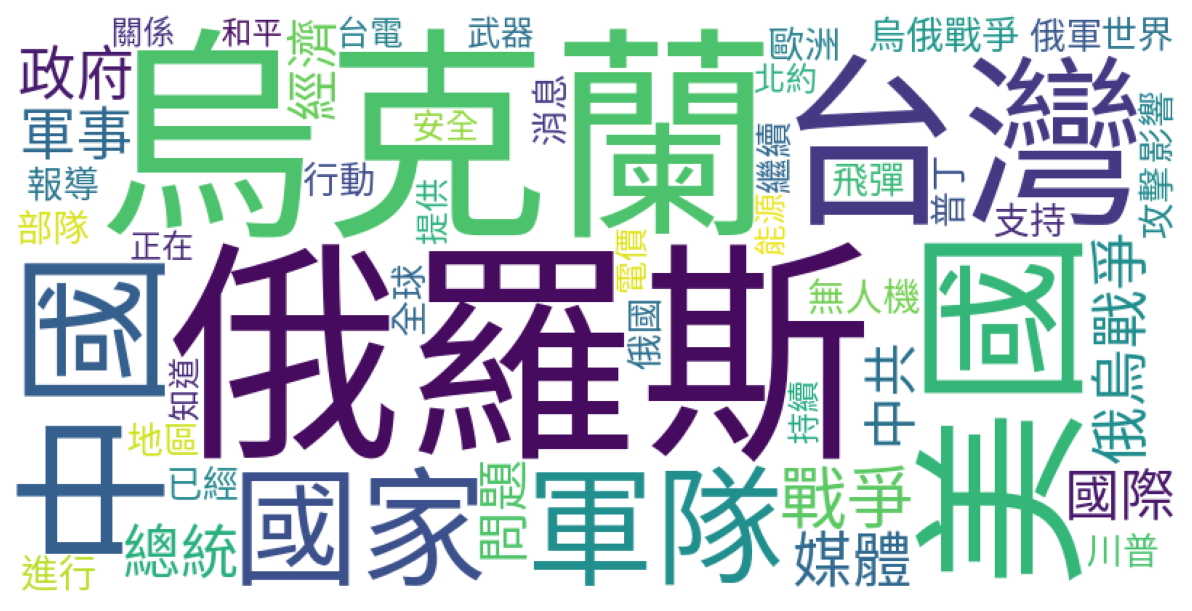

In [21]:
freq_dict_updated = freq_df_updated.set_index('word').to_dict()
freq_dict_updated = freq_dict_updated['count']

# 繪製文字雲
wordcloud_after = WordCloud(background_color='white', width=800, height = 400, font_path = FontPath, max_words = 50)
wordcloud_after.generate_from_frequencies(freq_dict_updated)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud_after)
plt.axis('off')
plt.show()

### 1.3 比較清理前後的文字雲

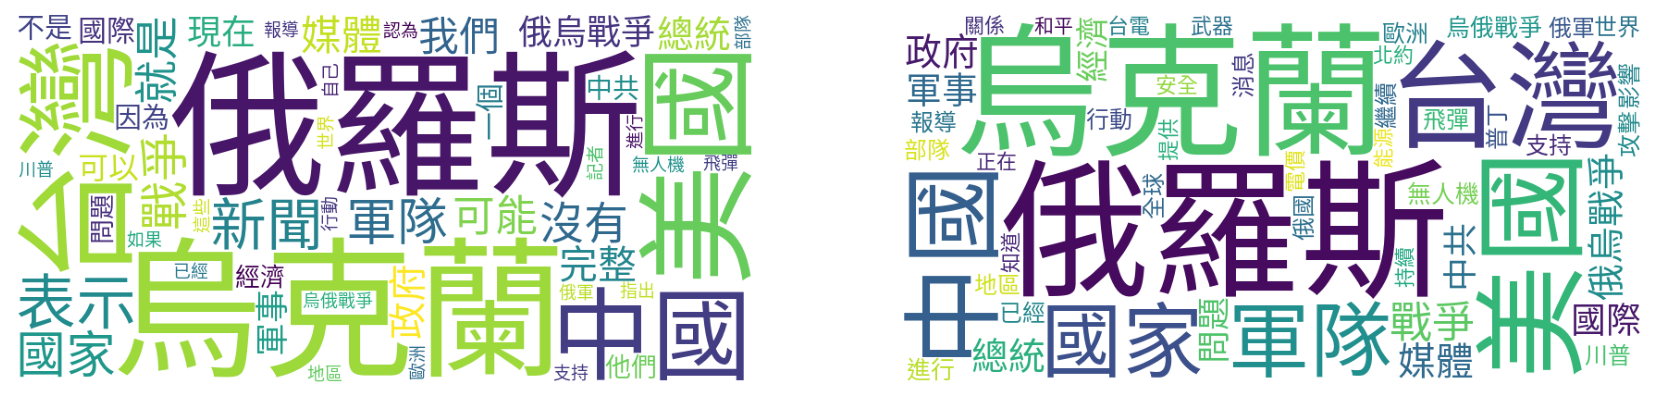

In [22]:
plt.figure(figsize = (14,8))

plt.subplot(1,2,1)
plt.imshow(wordcloud)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wordcloud_after)
plt.axis('off')

plt.show()

從圖中可以看出，「俄羅斯」、「烏克蘭」、「美國」、「中國」、「台灣」、「戰爭」、「軍隊」、「國家」、「政府」等字詞尤為突出，顯示使用者在討論俄烏戰爭時，關注的不僅限於衝突雙方，亦涉及美中兩大國及台灣的戰略處境。值得注意的是，儘管俄烏戰爭與台海兩岸議題並不直接相關，「美國」一詞卻頻繁出現，顯示其在PTT上的影響力受到廣泛關注與討論。

此外，「媒體」、「總統」、「經濟」、「安全」、「飛彈」、「北約」等字詞的出現，也反映出討論涵蓋了政治、軍事、媒體影響與國際安全等多重層面。比較令人意外的是，作為導致戰爭原因之一的「北約」，其出現頻率相對偏低，可能反映出部分使用者對其角色的關注程度有限。

整體而言，此結果顯示PTT網友對俄烏戰爭的關注具有高度的政治敏感性與國際視野，為後續深入分析提供了方向依據。

## 2.利用lexicon-base進行情緒分析

In [23]:
# 讀取情緒字典
liwc_dict = pd.read_csv("./dict/liwc/LIWC_CH.csv")
liwc_dict = liwc_dict.rename(columns={'name': 'word', "class": 'sentiments'})
liwc_dict.head()

word sentiments
0   ):     affect
1   3q     affect
2   :(     affect
3   :)     affect
4   <3     affect

情緒字典與斷詞結果進行合併

In [24]:
ptt_liwc_df = pd.merge(noStop_df[["artUrl", "artDate", "artTitle", "artContent", "word"]], liwc_dict, how="left")
ptt_liwc_df

artUrl     artDate  \
0        https://www.ptt.cc/bbs/Gossiping/M.1645663423....  2022-02-24   
1        https://www.ptt.cc/bbs/Gossiping/M.1645663423....  2022-02-24   
2        https://www.ptt.cc/bbs/Gossiping/M.1645663423....  2022-02-24   
3        https://www.ptt.cc/bbs/Gossiping/M.1645663423....  2022-02-24   
4        https://www.ptt.cc/bbs/Gossiping/M.1645663423....  2022-02-24   
...                                                    ...         ...   
2753378  https://www.ptt.cc/bbs/HatePolitics/M.17477721...  2025-05-21   
2753379  https://www.ptt.cc/bbs/HatePolitics/M.17477721...  2025-05-21   
2753380  https://www.ptt.cc/bbs/HatePolitics/M.17477721...  2025-05-21   
2753381  https://www.ptt.cc/bbs/HatePolitics/M.17477721...  2025-05-21   
2753382  https://www.ptt.cc/bbs/HatePolitics/M.17477721...  2025-05-21   

                        artTitle  \
0        [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？   
1        [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？   
2        [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？   
3        [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？   
4        [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？   
...                          ...   
2753378    [轉錄]名為變態的神父：芬蘭大使與芬蘭歷史   
2753379    [轉錄]名為變態的神父：芬蘭大使與芬蘭歷史   
2753380    [轉錄]名為變態的神父：芬蘭大使與芬蘭歷史   
2753381    [轉錄]名為變態的神父：芬蘭大使與芬蘭歷史   
2753382    [轉錄]名為變態的神父：芬蘭大使與芬蘭歷史   

                                                artContent word sentiments  
0        大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...  烏克蘭        NaN  
1        大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...  俄羅斯        NaN  
2        大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   戰爭     affect  
3        大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   戰爭   negative  
4        大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   戰爭      anger  
...                                                    ...  ...        ...  
2753378  1.轉錄網址︰\nhttps://www.facebook.com/holyshinbu/\...   歷史        NaN  
2753379  1.轉錄網址︰\nhttps://www.facebook.com/holyshinbu/\...   順便        NaN  
2753380  1.轉錄網址︰\nhttps://www.facebook.com/holyshinbu/\...   帶入        NaN  
2753381  1.轉錄網址︰\nhttps://www.facebook.com/holyshinbu/\...   國際        NaN  
2753382  1.轉錄網址︰\nhttps://www.facebook.com/holyshinbu/\...   外交        NaN  

[2753383 rows x 6 columns]

### 2.1 正負向情緒詞彙頻率折線圖

In [25]:
sentiment_count = pd.DataFrame(
    ptt_liwc_df.groupby(["artDate", "sentiments"]).size()
).reset_index()

mask = (sentiment_count['sentiments'] == "positive") | (sentiment_count['sentiments'] == "negative")
sentiment_count = sentiment_count.loc[mask]

sentiment_count = sentiment_count.rename(columns={0: "size"})
sentiment_count = sentiment_count.sort_values(["artDate"])
sentiment_count

artDate sentiments  size
3     2022-02-24   negative   245
4     2022-02-24   positive   176
9     2022-02-25   negative   512
10    2022-02-25   positive   354
15    2022-02-26   negative   636
...          ...        ...   ...
6515  2025-05-19   positive    45
6520  2025-05-20   negative   168
6521  2025-05-20   positive   300
6526  2025-05-21   negative   129
6527  2025-05-21   positive    46

[2211 rows x 3 columns]

繪製正負情緒詞彙頻率折線圖

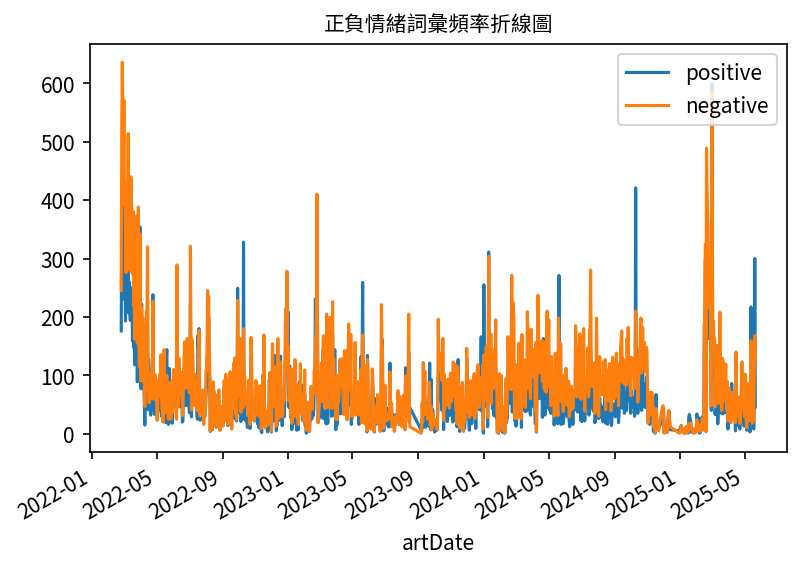

In [26]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

ax.plot(pos["artDate"], pos["size"], color=colors[0])
ax.plot(neg["artDate"], neg["size"], color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒詞彙頻率折線圖", fontproperties=fprop)  # 記得加上才能顯示中文
plt.show()

結論: 從2022年後在ptt討論烏俄戰爭時，正負面詞彙的使用無太大的起伏，一直到2024-11,到2025-02這段時間突然討論量大幅下跌，我們懷疑是因為川普當選，並且在當時引發的大罷免話題，使的ptt對烏俄戰爭的討論大幅下降，但是在2025年3月後又突然大幅增加討論，我們認為是因為川普要介入烏俄戰爭而使的討論突然熱烈起來，但是看起來似乎進展不大，而後又逐步下降

### 2.2 正負向情緒詞彙比例折線圖

In [27]:
sentiment_count = sentiment_count.assign(
    ratio=sentiment_count.groupby("artDate")["size"].transform(lambda n: n / n.sum())
)
sentiment_count

artDate sentiments  size     ratio
3     2022-02-24   negative   245  0.581948
4     2022-02-24   positive   176  0.418052
9     2022-02-25   negative   512  0.591224
10    2022-02-25   positive   354  0.408776
15    2022-02-26   negative   636  0.601134
...          ...        ...   ...       ...
6515  2025-05-19   positive    45  0.283019
6520  2025-05-20   negative   168  0.358974
6521  2025-05-20   positive   300  0.641026
6526  2025-05-21   negative   129  0.737143
6527  2025-05-21   positive    46  0.262857

[2211 rows x 4 columns]

Text(0.5, 1.0, '正負情緒比例折線圖')

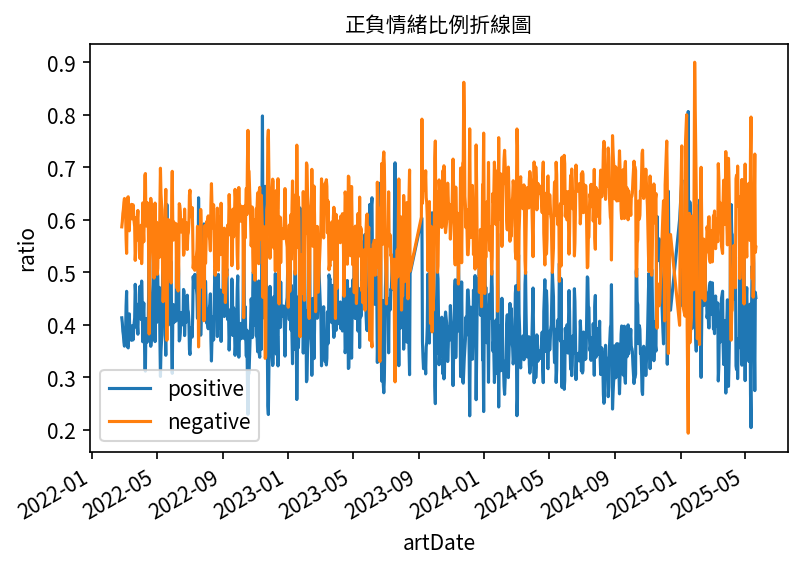

In [28]:
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]
fig, ax = plt.subplots()

# 使用 Series.rolling().mean() 來產生 2 天平均
rolling_days = 2
ax.plot(pos["artDate"], pos["ratio"].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["ratio"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
plt.ylabel("ratio")
ax.legend(["positive", "negative"], loc="lower left")
fig.autofmt_xdate()
plt.title("正負情緒比例折線圖", fontproperties=fprop)

整體而言，負面情緒的比例始終高於正面情緒，若排除極端立場或戰爭狂熱者，此一結果可被視為合理且符合一般大眾情感反應的趨勢。然而，這些負面情緒究竟是源於對俄烏戰爭中死傷慘重的悲憫與同情，抑或是對戰爭可能影響自身安全或區域穩定的焦慮與不安，仍有待進一步語義層面的深入分析與釐清。

### 2.3 文章為單位的情緒分析

In [29]:
sentiment_count_by_article = pd.DataFrame(
    ptt_liwc_df.groupby(["artUrl", "sentiments"]).size()
).reset_index()
sentiment_count_by_article = sentiment_count_by_article.rename(columns={0: "size"})
sentiment_count_by_article.head(10)

artUrl sentiments  size
0  https://www.ptt.cc/bbs/Gossiping/M.1645663423....     affect     4
1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....      anger     2
2  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   negative     2
3  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   positive     2
4  https://www.ptt.cc/bbs/Gossiping/M.1645664873....     affect     2
5  https://www.ptt.cc/bbs/Gossiping/M.1645664873....   negative     2
6  https://www.ptt.cc/bbs/Gossiping/M.1645677956....     affect     7
7  https://www.ptt.cc/bbs/Gossiping/M.1645677956....      anger     1
8  https://www.ptt.cc/bbs/Gossiping/M.1645677956....   negative     4
9  https://www.ptt.cc/bbs/Gossiping/M.1645677956....   positive     3

In [30]:
ptt_sentiment_value_by_article = (
    sentiment_count_by_article.pivot_table(
        index="artUrl", columns="sentiments", values="size", fill_value=0
    )
    .reset_index()
    .rename_axis(None, axis=1)
)
ptt_sentiment_value_by_article.head()

artUrl  affect  anger  anx  \
0  https://www.ptt.cc/bbs/Gossiping/M.1645663423....     4.0    2.0  0.0   
1  https://www.ptt.cc/bbs/Gossiping/M.1645664873....     2.0    0.0  0.0   
2  https://www.ptt.cc/bbs/Gossiping/M.1645677956....     7.0    1.0  0.0   
3  https://www.ptt.cc/bbs/Gossiping/M.1645678395....     2.0    0.0  1.0   
4  https://www.ptt.cc/bbs/Gossiping/M.1645678419....     5.0    2.0  0.0   

   negative  positive  sad  
0       2.0       2.0  0.0  
1       2.0       0.0  0.0  
2       4.0       3.0  0.0  
3       2.0       0.0  0.0  
4       4.0       0.0  0.0

In [31]:
# sentiment 計算方式: positive - negative
ptt_sentiment_value_by_article["sentiment_value"] = (
    ptt_sentiment_value_by_article["positive"]
    - ptt_sentiment_value_by_article["negative"]
)
ptt_sentiment_value_by_article.head()

artUrl  affect  anger  anx  \
0  https://www.ptt.cc/bbs/Gossiping/M.1645663423....     4.0    2.0  0.0   
1  https://www.ptt.cc/bbs/Gossiping/M.1645664873....     2.0    0.0  0.0   
2  https://www.ptt.cc/bbs/Gossiping/M.1645677956....     7.0    1.0  0.0   
3  https://www.ptt.cc/bbs/Gossiping/M.1645678395....     2.0    0.0  1.0   
4  https://www.ptt.cc/bbs/Gossiping/M.1645678419....     5.0    2.0  0.0   

   negative  positive  sad  sentiment_value  
0       2.0       2.0  0.0              0.0  
1       2.0       0.0  0.0             -2.0  
2       4.0       3.0  0.0             -1.0  
3       2.0       0.0  0.0             -2.0  
4       4.0       0.0  0.0             -4.0

In [32]:
ptt_sentiment_value_by_article['sentiment_class'] = ptt_sentiment_value_by_article['sentiment_value'].apply(lambda x: "正向" if x > 0 else "負向" )
ptt_sentiment_value_by_article.head(10)

artUrl  affect  anger  anx  \
0  https://www.ptt.cc/bbs/Gossiping/M.1645663423....     4.0    2.0  0.0   
1  https://www.ptt.cc/bbs/Gossiping/M.1645664873....     2.0    0.0  0.0   
2  https://www.ptt.cc/bbs/Gossiping/M.1645677956....     7.0    1.0  0.0   
3  https://www.ptt.cc/bbs/Gossiping/M.1645678395....     2.0    0.0  1.0   
4  https://www.ptt.cc/bbs/Gossiping/M.1645678419....     5.0    2.0  0.0   
5  https://www.ptt.cc/bbs/Gossiping/M.1645678799....     5.0    0.0  0.0   
6  https://www.ptt.cc/bbs/Gossiping/M.1645678981....     7.0    2.0  0.0   
7  https://www.ptt.cc/bbs/Gossiping/M.1645680324....    14.0    4.0  1.0   
8  https://www.ptt.cc/bbs/Gossiping/M.1645681125....     2.0    1.0  1.0   
9  https://www.ptt.cc/bbs/Gossiping/M.1645681612....     7.0    0.0  0.0   

   negative  positive  sad  sentiment_value sentiment_class  
0       2.0       2.0  0.0              0.0              負向  
1       2.0       0.0  0.0             -2.0              負向  
2       4.0       3.0  0.0             -1.0              負向  
3       2.0       0.0  0.0             -2.0              負向  
4       4.0       0.0  0.0             -4.0              負向  
5       0.0       5.0  0.0              5.0              正向  
6       4.0       3.0  0.0             -1.0              負向  
7       7.0       6.0  0.0             -1.0              負向  
8       2.0       0.0  0.0             -2.0              負向  
9       3.0       4.0  0.0              1.0              正向

In [33]:
clear_df_sentiment = pd.merge(df, ptt_sentiment_value_by_article[['artUrl', 'sentiment_class']], how="left")
clear_df_sentiment["artDate"] = pd.to_datetime(clear_df_sentiment["artDate"])
clear_df_sentiment['artDate'] = clear_df_sentiment['artDate'].dt.date
clear_df_sentiment.head(10)

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
1          2  https://www.ptt.cc/bbs/Gossiping/M.1645664873....   
2          3  https://www.ptt.cc/bbs/Gossiping/M.1645677360....   
3          4  https://www.ptt.cc/bbs/Gossiping/M.1645677956....   
4          5  https://www.ptt.cc/bbs/Gossiping/M.1645678395....   
5          6  https://www.ptt.cc/bbs/Gossiping/M.1645678419....   
6          7  https://www.ptt.cc/bbs/Gossiping/M.1645678799....   
7          8  https://www.ptt.cc/bbs/Gossiping/M.1645678981....   
8          9  https://www.ptt.cc/bbs/Gossiping/M.1645680324....   
9         10  https://www.ptt.cc/bbs/Gossiping/M.1645681125....   

                     artTitle     artDate     artPoster artCatagory  \
0     [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24     avexgroup   Gossiping   
1  Re:[問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24     BleedWang   Gossiping   
2              [問卦]共產黨會打共產黨嗎？  2022-02-24        Dubroy   Gossiping   
3           [問卦]台灣民眾對烏俄戰爭的態度？  2022-02-24  generalfungi   Gossiping   
4          [問卦]大家想像的戰爭是不是太誇張了  2022-02-24  Schrodingers   Gossiping   
5        Re:[問卦]台灣民眾對烏俄戰爭的態度？  2022-02-24   james11song   Gossiping   
6        Re:[問卦]台灣民眾對烏俄戰爭的態度？  2022-02-24     noborukun   Gossiping   
7         [問卦]朋友小吃店店名要不要先改名了？  2022-02-24        YU0121   Gossiping   
8     [新聞]逾半民眾誤判俄羅斯出兵情勢　游盈隆：這  2022-02-24       blue999   Gossiping   
9         [問卦]烏俄戰爭一觸即發台灣看了不怕嗎  2022-02-24  wang19980531   Gossiping   

                                          artContent  \
0  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   
1  怎麽支援？？\n\n中華民國國軍 可以拿來運輸的載具\n\n只有C-130 而且還是商用版 ...   
2  假設對岸趁俄烏戰爭\n想要教訓一下美國的小弟\n這時候美國小弟跳出來說\n我跟你一樣是共產黨...   
3  1\n\n打仗不好，會死人，希望儘快結束\n\n\n2\n\n希望越慘越好，血流成河更爽，最...   
4  看板上一堆人在討論烏俄戰爭 即將爆發\n\n\n八成都是腦補 城市陷入煉獄火焰之中吧\n\n...   
5  爆\n3. 啊現在疫情這麼嚴重，不好好待在家怎麼還在打仗？\n\n啊他們打仗有沒有戴口罩？\...   
6  3.支持中國挺烏克蘭，出兵支援烏國，\n台灣協助饋贈祖國國產步槍跟派遣愛國（中國）青年前去中...   
7  朋友去年年底創業賣小吃\n店名取 Taiwan way(台灣味）\n然而最近烏俄戰爭關係\n...   
8  逾半民眾誤判俄羅斯出兵情勢　游盈隆：這是不想中共武力犯台的心理投射\n\n蔡佩珈  風傳媒\...   
9  烏克蘭和俄羅斯的戰爭一觸即發\n股票、數位貨幣大跳水\n反觀中國大陸與台灣的關係\n也處於緊...   

                                          artComment             e_ip  \
0  [{"cmtStatus": "推", "cmtPoster": "bumerang", "...    101.10.46.162   
1  [{"cmtStatus": "噓", "cmtPoster": "kanaptt", "c...  180.217.231.165   
2  [{"cmtStatus": "推", "cmtPoster": "ilovemiao", ...  101.137.223.159   
3  [{"cmtStatus": "推", "cmtPoster": "a4752695", "...   223.137.188.86   
4  [{"cmtStatus": "推", "cmtPoster": "wwf1310", "c...   61.222.158.103   
5  [{"cmtStatus": "推", "cmtPoster": "Lhmstu", "cm...   223.136.88.251   
6  [{"cmtStatus": "推", "cmtPoster": "zx1027112233...   49.216.222.111   
7  [{"cmtStatus": "推", "cmtPoster": "Beyond27", "...    112.78.67.242   
8  [{"cmtStatus": "推", "cmtPoster": "letmepass", ...     42.72.145.70   
9  [{"cmtStatus": "推", "cmtPoster": "currry", "cm...   101.12.100.162   

          insertedDate dataSource sentiment_class  
0  2022-02-25 00:29:48        ptt              負向  
1  2022-02-25 00:29:54        ptt              負向  
2  2022-02-25 00:32:24        ptt             NaN  
3  2022-02-25 00:32:36        ptt              負向  
4  2022-02-25 00:32:49        ptt              負向  
5  2022-02-25 00:32:49        ptt              負向  
6  2022-02-25 00:33:03        ptt              正向  
7  2022-02-25 00:33:03        ptt              負向  
8  2022-02-25 00:33:36        ptt              負向  
9  2022-02-25 00:33:57        ptt              負向

In [34]:
sentiment_art_count = pd.DataFrame(
    clear_df_sentiment.groupby(["artDate", "sentiment_class"]).size()
).reset_index()
sentiment_art_count = sentiment_art_count.rename(columns={0: "size"})
sentiment_art_count = sentiment_art_count.sort_values(["artDate"])
sentiment_art_count

artDate sentiment_class  size
0     2022-02-24              正向    22
1     2022-02-24              負向    55
2     2022-02-25              正向    37
3     2022-02-25              負向    92
4     2022-02-26              正向    43
...          ...             ...   ...
2024  2025-05-19              正向     1
2025  2025-05-19              負向     3
2027  2025-05-20              負向     5
2026  2025-05-20              正向     5
2028  2025-05-21              負向     5

[2029 rows x 3 columns]

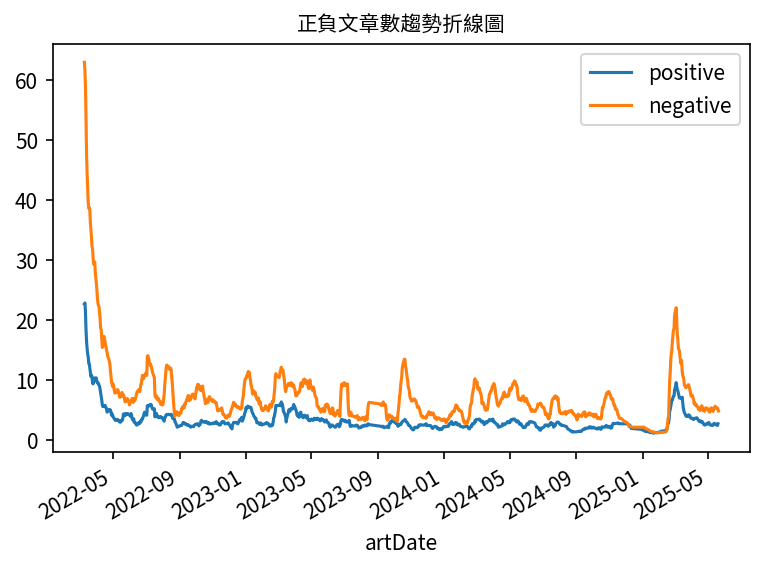

In [35]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_art_count[sentiment_art_count["sentiment_class"] == "正向"]
neg = sentiment_art_count[sentiment_art_count["sentiment_class"] == "負向"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

# 使用 Series.rolling().mean() 來產生 14 天平均
rolling_days = 14
ax.plot(pos["artDate"], pos['size'].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["size"].rolling(rolling_days).mean(), color=colors[1])
# ax.plot(pos["artDate"], pos['size'], color=colors[0])
# ax.plot(neg["artDate"], neg["size"], color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負文章數趨勢折線圖", fontproperties=fprop)  # 記得加上才能顯示中文
plt.show()

大部分文章都被歸類在負向文章，八卦版,政黑板有關俄烏戰爭討論內容大多偏負面

### 2.4 情緒代表字長條圖

In [36]:
word_count = ptt_liwc_df.groupby(["word", "sentiments"]).size().reset_index()
word_count = word_count.rename(columns={0: "size"})
word_count = word_count.sort_values(["size"], ascending=False)
word_count

word sentiments   size
1511    戰爭   negative  10425
1510    戰爭      anger  10425
1509    戰爭     affect  10425
714     問題     affect   5752
715     問題   negative   5752
...    ...        ...    ...
1441    憂傷     affect      1
1442    憂傷   negative      1
3272    開朗   positive      1
3271    開朗     affect      1
1652  提心弔膽   negative      1

[3477 rows x 3 columns]

In [37]:
word_of_pos = word_count.loc[(word_count["sentiments"] == "positive")]
word_of_pos.head(10)

word sentiments  size
1720   支持   positive  4986
986    安全   positive  3712
668    和平   positive  3416
1088   希望   positive  2866
3245   重要   positive  2794
2788   自由   positive  1758
2030   決定   positive  1714
2945   解決   positive  1563
1492   成功   positive  1347
2482   相信   positive  1255

In [38]:
word_of_neg = word_count.loc[(word_count["sentiments"] == "negative")]
word_of_neg.head(10)

word sentiments   size
1511   戰爭   negative  10425
715    問題   negative   5752
1735   攻擊   negative   4110
371    入侵   negative   2389
957    威脅   negative   2088
2919   衝突   negative   2008
2271   爆發   negative   1842
1668   損失   negative   1673
789    嚴重   negative   1613
2898   虧損   negative   1520

<ipython-input-39-e3108d639fc7>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(pos["word"], fontproperties=fprop)
<ipython-input-39-e3108d639fc7>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(neg["word"], fontproperties=fprop)


Text(0.5, 1.0, '負向情緒總數')

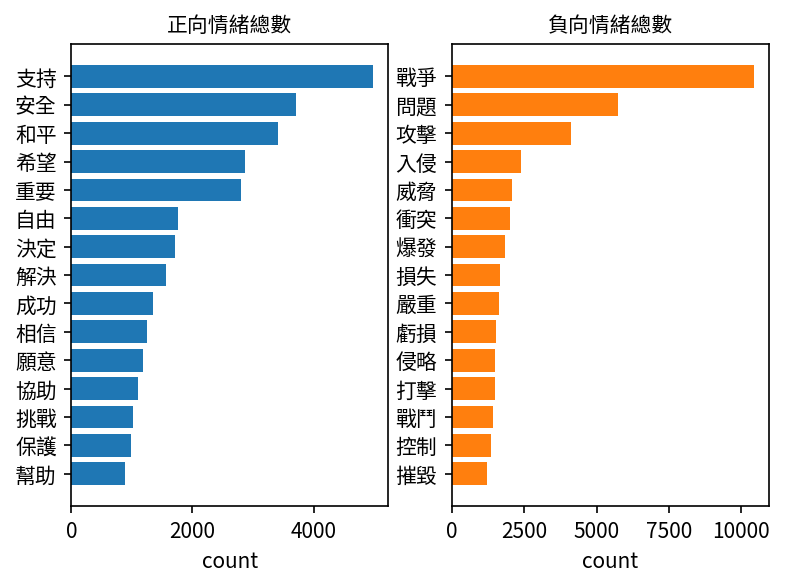

In [39]:
pos = word_of_pos.head(15).sort_values(["size"], ascending=True)
neg = word_of_neg.head(15).sort_values(["size"], ascending=True)

fig, ax = plt.subplots(1, 2)

ax[0].barh(pos["word"], pos["size"], color=colors[0])
ax[0].set_xlabel("count")
ax[0].set_yticklabels(pos["word"], fontproperties=fprop)
ax[0].set_title("正向情緒總數", fontproperties=fprop)

ax[1].barh(neg["word"], neg["size"], color=colors[1])
ax[1].set_xlabel("count")
ax[1].set_yticklabels(neg["word"], fontproperties=fprop)
ax[1].set_title("負向情緒總數", fontproperties=fprop)

反覆檢查情緒詞是否符合本文本 (以「停火」為例)

In [40]:
filtered_df = sent_df[sent_df['sentence'].str.contains('停火', na=False)]
filtered_df.head()

system_id                                             artUrl  \
17             3  https://www.ptt.cc/bbs/Gossiping/M.1645677360....   
3545         219  https://www.ptt.cc/bbs/Gossiping/M.1645847691....   
11743        706  https://www.ptt.cc/bbs/Gossiping/M.1646263499....   
16914        880  https://www.ptt.cc/bbs/Gossiping/M.1646565672....   
22123       1041  https://www.ptt.cc/bbs/Gossiping/M.1646883558....   

                        artTitle     artDate  \
17                [問卦]共產黨會打共產黨嗎？  2022-02-24   
3545      [新聞]下流當有趣！俄烏戰爭中國男竟喊「收留  2022-02-26   
11743         [新聞]俄入侵已一周俄烏展開二輪談判  2022-03-03   
16914  [新聞]施壓普欽收手!義大利怒抄俄羅斯富豪42億遊  2022-03-06   
22123   [新聞]國安局證實：共機運-8三月上旬在南海墜海  2022-03-10   

                                              artContent  \
17     假設對岸趁俄烏戰爭\n想要教訓一下美國的小弟\n這時候美國小弟跳出來說\n我跟你一樣是共產黨...   
3545   備註請放最後面 違者新聞文章刪除\n\n1.媒體來源:\n民視\n\n2.記者署名:\n林孟...   
11743  備註請放最後面 違者新聞文章刪除\n\n1.媒體來源:\n聯合新聞網\n\n2.記者署名:\...   
16914  1.媒體來源:\nTVBS\n\n2.記者署名:\n周子馨\n\n3.完整新聞標題:\n施壓...   
22123  ETtoday新聞雲\n\n國安局證實：共機「運-8」3月上旬在南海墜海\nhttps://...   

                                                sentence  
17     假設對岸趁俄烏戰爭想要教訓一下美國的小弟這時候美國小弟跳出來說我跟你一樣是共產黨啊自己人不打...  
3545                                           希望俄羅斯立即停火  
11743                                               才能停火  
16914                                        讓他們轉向普欽施壓停火  
22123                             家態度立場第三方介入停火談判與人道救援等動向

In [41]:
#列出前20個有關"停火"的關鍵字
sentenct=filtered_df['sentence'][:20]
sentenct

17       假設對岸趁俄烏戰爭想要教訓一下美國的小弟這時候美國小弟跳出來說我跟你一樣是共產黨啊自己人不打...
3545                                             希望俄羅斯立即停火
11743                                                 才能停火
16914                                          讓他們轉向普欽施壓停火
22123                               家態度立場第三方介入停火談判與人道救援等動向
23520                          雙方外長於台北時間10日所舉行的外長會談未取得停火共識
23580                                         雙方就在停火方面沒有共識
23958                          3完整新聞標題首度用戰爭兩字籲停火　大陸與俄的距離曖昧
23972                                            說希望儘快止戰停火
25022                                   俄烏雙方停火談判同意設置人道主義走廊
25482                                          新西蘭持續呼籲你們停火
26497                                        但對於停火協議仍未達成共識
28450                                     將聚焦和平停火立即撤軍和安全保證
31682                                    達成目標才停火 Wallace宣布
33121                                                 即使停火
35414                                           若最後簽署的停火協議
38332                                     只能發布全面動員令或回應停火談判
38368                                             俄羅斯將提出停火
39995                                         即使俄烏雙方達成停火協議
40146                                   而俄軍在戰事失敗後應該會提出停火和談
Name: sentence, dtype: object

去除不符合文本的情緒詞：希望、成功、重要、願意、八卦、警告、朋友、清楚、同意
，並且重新計算情緒

In [42]:
# 設定要移除的字詞列表
words_to_remove = ['希望','成功','重要','願意','八卦','警告','朋友','清楚','同意','挑戰']
# 使用 ~ 運算子和 isin() 方法過濾掉包含在 words_to_remove 列表中的行
liwc_dict_revise = liwc_dict[~liwc_dict['word'].isin(words_to_remove)]
# 使用更新後的情緒字典 merge
ptt_liwc_df_revise = pd.merge(noStop_df[["artUrl", "artDate", "artTitle", "artContent","word"]], liwc_dict_revise, how="left")
ptt_liwc_df_revise.head()

artUrl     artDate  \
0  https://www.ptt.cc/bbs/Gossiping/M.1645663423....  2022-02-24   
1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....  2022-02-24   
2  https://www.ptt.cc/bbs/Gossiping/M.1645663423....  2022-02-24   
3  https://www.ptt.cc/bbs/Gossiping/M.1645663423....  2022-02-24   
4  https://www.ptt.cc/bbs/Gossiping/M.1645663423....  2022-02-24   

                  artTitle                                         artContent  \
0  [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   
1  [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   
2  [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   
3  [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   
4  [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   

  word sentiments  
0  烏克蘭        NaN  
1  俄羅斯        NaN  
2   戰爭     affect  
3   戰爭   negative  
4   戰爭      anger

<ipython-input-43-b0689ef24f23>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(pos["word"], fontproperties=fprop)
<ipython-input-43-b0689ef24f23>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(neg["word"], fontproperties=fprop)


Text(0.5, 1.0, '負向情緒總數')

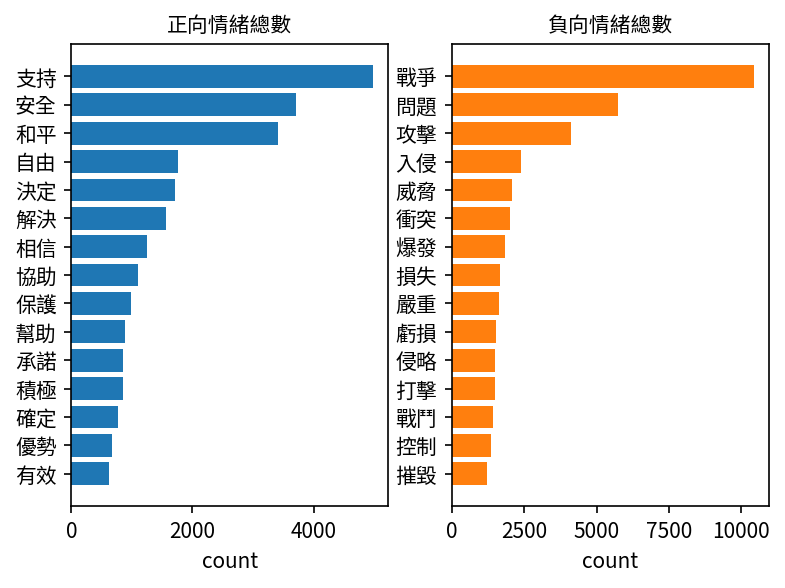

In [43]:
word_count = ptt_liwc_df_revise.groupby(["word", "sentiments"]).size().reset_index()
word_count = word_count.rename(columns={0: "size"})
word_count = word_count.sort_values(["size"], ascending=False)
word_of_pos = word_count.loc[(word_count["sentiments"] == "positive")]
word_of_neg = word_count.loc[(word_count["sentiments"] == "negative")]
pos = word_of_pos.head(15).sort_values(["size"], ascending=True)
neg = word_of_neg.head(15).sort_values(["size"], ascending=True)

fig, ax = plt.subplots(1, 2)

ax[0].barh(pos["word"], pos["size"], color=colors[0])
ax[0].set_xlabel("count")
ax[0].set_yticklabels(pos["word"], fontproperties=fprop)
ax[0].set_title("正向情緒總數", fontproperties=fprop)

ax[1].barh(neg["word"], neg["size"], color=colors[1])
ax[1].set_xlabel("count")
ax[1].set_yticklabels(neg["word"], fontproperties=fprop)
ax[1].set_title("負向情緒總數", fontproperties=fprop)

### 2.5 探討折線圖異常處(文字雲、字詞關係分析)

進一步篩選折線圖上面看起來聲量異常的地方（2024-10）。我們用文字雲來看一下這段時間出現了什麼關鍵字和字詞關係。

將前面計算出的文章情緒類別合併，以利我們過濾出負面文章資料

In [44]:
ptt_liwc_df_revise = pd.merge(ptt_liwc_df_revise, ptt_sentiment_value_by_article[['artUrl', 'sentiment_class']], how="left")
ptt_liwc_df_revise.head()

artUrl     artDate  \
0  https://www.ptt.cc/bbs/Gossiping/M.1645663423....  2022-02-24   
1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....  2022-02-24   
2  https://www.ptt.cc/bbs/Gossiping/M.1645663423....  2022-02-24   
3  https://www.ptt.cc/bbs/Gossiping/M.1645663423....  2022-02-24   
4  https://www.ptt.cc/bbs/Gossiping/M.1645663423....  2022-02-24   

                  artTitle                                         artContent  \
0  [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   
1  [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   
2  [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   
3  [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   
4  [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   

  word sentiments sentiment_class  
0  烏克蘭        NaN              負向  
1  俄羅斯        NaN              負向  
2   戰爭     affect              負向  
3   戰爭   negative              負向  
4   戰爭      anger              負向

In [45]:
sent_df = pd.merge(sent_df, ptt_sentiment_value_by_article[['artUrl', 'sentiment_class']], how="left")
sent_df.head()

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
1          1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
2          1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
3          2  https://www.ptt.cc/bbs/Gossiping/M.1645664873....   
4          2  https://www.ptt.cc/bbs/Gossiping/M.1645664873....   

                     artTitle     artDate  \
0     [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
1     [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
2     [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
3  Re:[問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   
4  Re:[問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24   

                                          artContent  \
0  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   
1  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   
2  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   
3  怎麽支援？？\n\n中華民國國軍 可以拿來運輸的載具\n\n只有C-130 而且還是商用版 ...   
4  怎麽支援？？\n\n中華民國國軍 可以拿來運輸的載具\n\n只有C-130 而且還是商用版 ...   

                                            sentence sentiment_class  
0  大家好烏克蘭 俄羅斯戰爭一觸即發中華民國台灣一向很熱心想積極參與國際事務軍力排名也是全球第2...              負向  
1                       本蛇想問如果國軍到了戰爭現場可以做些什麼事情讓大家驚艷呢              負向  
2                                                有卦嗎              負向  
3                                               怎麽支援              負向  
4                                   中華民國國軍 可以拿來運輸的載具              負向

In [46]:
date = "2024-10-01"
end_date = "2025-02-28"
mask = (ptt_liwc_df_revise['artDate'] >= pd.Timestamp(date).date()) & (
    ptt_liwc_df_revise['artDate'] <= pd.Timestamp(end_date).date()) & (
    ptt_liwc_df_revise['sentiment_class'] == "負向")

ptt_df_wc = ptt_liwc_df_revise.loc[mask]
ptt_df_wc.head()

artUrl     artDate  \
2075619  https://www.ptt.cc/bbs/Gossiping/M.1727770178....  2024-10-01   
2075620  https://www.ptt.cc/bbs/Gossiping/M.1727770178....  2024-10-01   
2075621  https://www.ptt.cc/bbs/Gossiping/M.1727770178....  2024-10-01   
2075622  https://www.ptt.cc/bbs/Gossiping/M.1727770178....  2024-10-01   
2075623  https://www.ptt.cc/bbs/Gossiping/M.1727770178....  2024-10-01   

                        artTitle  \
2075619  [問卦]烏俄告訴我們現代戰爭沒有二戰那麼誇張?   
2075620  [問卦]烏俄告訴我們現代戰爭沒有二戰那麼誇張?   
2075621  [問卦]烏俄告訴我們現代戰爭沒有二戰那麼誇張?   
2075622  [問卦]烏俄告訴我們現代戰爭沒有二戰那麼誇張?   
2075623  [問卦]烏俄告訴我們現代戰爭沒有二戰那麼誇張?   

                                                artContent  word sentiments  \
2075619  烏俄戰爭到現在兩年半\n\n前線依然戰鬥激烈\n\n但是大後方普遍居民其實滿生活正常的\n\...  烏俄戰爭        NaN   
2075620  烏俄戰爭到現在兩年半\n\n前線依然戰鬥激烈\n\n但是大後方普遍居民其實滿生活正常的\n\...    兩年        NaN   
2075621  烏俄戰爭到現在兩年半\n\n前線依然戰鬥激烈\n\n但是大後方普遍居民其實滿生活正常的\n\...    前線        NaN   
2075622  烏俄戰爭到現在兩年半\n\n前線依然戰鬥激烈\n\n但是大後方普遍居民其實滿生活正常的\n\...    依然        NaN   
2075623  烏俄戰爭到現在兩年半\n\n前線依然戰鬥激烈\n\n但是大後方普遍居民其實滿生活正常的\n\...    戰鬥     affect   

        sentiment_class  
2075619              負向  
2075620              負向  
2075621              負向  
2075622              負向  
2075623              負向

In [47]:
date = "2024-10-01"
end_date = "2025-02-28"
mask = (ptt_liwc_df_revise['artDate'] >= pd.Timestamp(date).date()) & (
    ptt_liwc_df_revise['artDate'] <= pd.Timestamp(end_date).date()) & (
    ptt_liwc_df_revise['sentiment_class'] == "負向")

ptt_df_wc = ptt_liwc_df_revise.loc[mask, ["artDate", "word"]]


word_count_count = pd.DataFrame(
    ptt_df_wc.groupby(["word"]).size()
).reset_index().rename(columns={0: "size"})
word_count_count = word_count_count.sort_values(by='size', ascending=False)
word_count_count

word  size
4110   俄羅斯  5453
13015  烏克蘭  4881
9576    戰爭  3144
15132   美國  1954
17279   軍隊  1583
...    ...   ...
8301    山東     1
8302   山毛櫸     1
8303    山洞     1
8304    山線     1
19545   龜縮     1

[19546 rows x 2 columns]

**繪製2024-10至2025-02的負面文章文字雲**

(-0.5, 799.5, 399.5, -0.5)

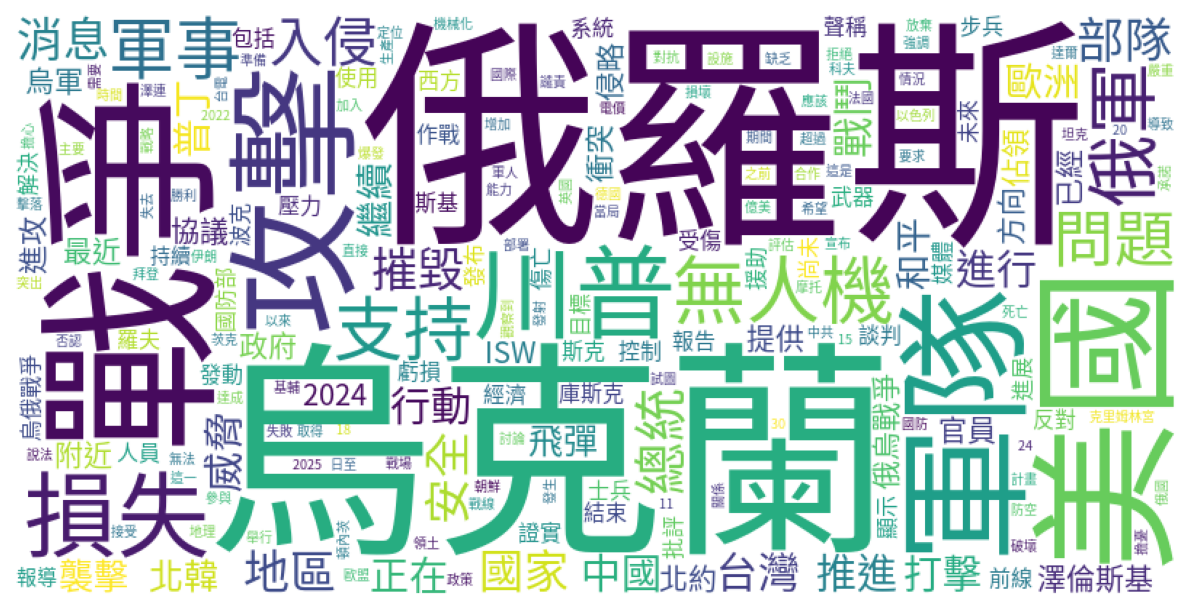

In [48]:
# wordcloud 的 input 是 dictionary
font_path = "./SourceHanSansTW-Regular.otf"  # 中文字型路徑
wc_dict = dict(zip(word_count_count['word'], word_count_count['size']))
#顯示前200個詞的文字雲
cloud = WordCloud(max_words=200, width=800, height = 400,background_color="white", font_path=font_path)
cloud.generate_from_frequencies(wc_dict)
# 繪圖
plt.figure(figsize = (10,7))
plt.imshow(cloud)
plt.axis("off")
#plt.show()

關鍵字出現了「俄羅斯」、「戰爭」、「烏克蘭」、「美國」的關鍵字，可能是在說明期間內的頻繁衝突

**進一步繪製出2024-10至2025-02包含「戰爭」的負面文章文字雲**

(-0.5, 799.5, 399.5, -0.5)

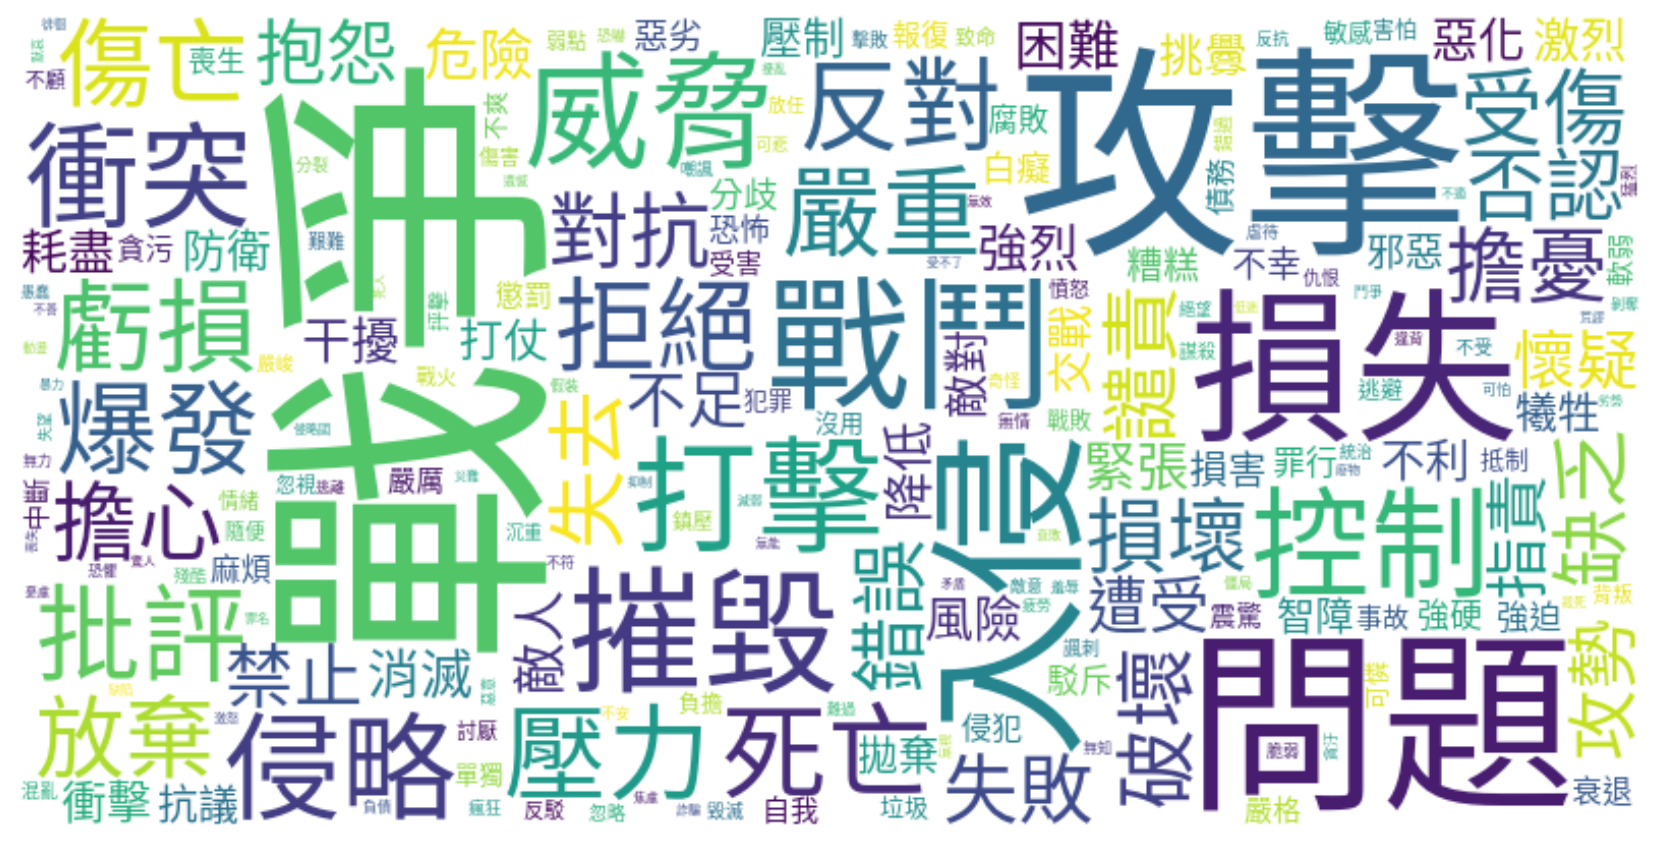

In [49]:
date = "2024-10-01"
end_date = "2025-02-28"
mask = (ptt_liwc_df_revise['artDate'] >= pd.Timestamp(date).date()) & (
    ptt_liwc_df_revise['artDate'] <= pd.Timestamp(end_date).date()) & ( # 時間區間
    ptt_liwc_df_revise['sentiment_class'] == "負向")  & ( # 負面文章
    ptt_liwc_df_revise['artContent'].str.contains('戰爭')) & ( # 內文包含攻擊
    ptt_liwc_df_revise["sentiments"] == "negative") # 負面情緒字

ptt_df_wc = ptt_liwc_df_revise.loc[mask, ["artDate", "word"]]
wc = ptt_df_wc.groupby(["word"]).size().to_dict()

# wordcloud 的 input 是 dictionary
font_path = "./SourceHanSansTW-Regular.otf"  # 中文字型路徑
cloud = WordCloud(max_words=200, width=800, height = 400,background_color="white", font_path=font_path)
cloud.generate_from_frequencies(wc)
# 繪圖
plt.figure(figsize = (14,8))
plt.imshow(
    cloud,
    interpolation="bilinear"
)
plt.axis("off")
# plt.show()

利用「問題」去查看原文內容

In [50]:
date = "2024-10-01"
end_date = "2025-02-28"
mask = (sent_df['artDate'] >= pd.Timestamp(date).date()) & (
    sent_df['artDate'] <= pd.Timestamp(end_date).date()) & (
    sent_df['sentiment_class'] == "負向") & (
    sent_df['artContent'].str.contains('戰爭')) & (
    sent_df['sentence'].str.contains('問題')) # 包含「問題」的句子

df_ = sent_df.loc[mask, ["artDate", "artContent", "sentence"]]
index_list = df_.index.tolist()


# 取得前後各5筆的索引 => 目的為查看包含該詞彙句子的上下文
surrounding_indices = []
for index in index_list:
    surrounding_indices.extend(range(index - 5, index + 6))

# 去除重複的索引，並確保不超出範圍
surrounding_indices = list(set(filter(lambda x: x >= 0 and x < len(sent_df), surrounding_indices)))

# 依據索引取得相應的資料
result_df = sent_df.iloc[surrounding_indices].sort_index()
result_df.head()

system_id                                             artUrl  \
396059       4322  https://www.ptt.cc/bbs/Gossiping/M.1727788713....   
396060       4322  https://www.ptt.cc/bbs/Gossiping/M.1727788713....   
396061       4322  https://www.ptt.cc/bbs/Gossiping/M.1727788713....   
396062       4322  https://www.ptt.cc/bbs/Gossiping/M.1727788713....   
396063       4322  https://www.ptt.cc/bbs/Gossiping/M.1727788713....   

                      artTitle     artDate  \
396059  [問卦]烏俄戰爭最新情報（20240930）  2024-10-01   
396060  [問卦]烏俄戰爭最新情報（20240930）  2024-10-01   
396061  [問卦]烏俄戰爭最新情報（20240930）  2024-10-01   
396062  [問卦]烏俄戰爭最新情報（20240930）  2024-10-01   
396063  [問卦]烏俄戰爭最新情報（20240930）  2024-10-01   

                                               artContent  \
396059  烏俄戰爭最新情報(950天)\n2024年9月30日\n=====波克羅夫斯克(紅軍村)戰線...   
396060  烏俄戰爭最新情報(950天)\n2024年9月30日\n=====波克羅夫斯克(紅軍村)戰線...   
396061  烏俄戰爭最新情報(950天)\n2024年9月30日\n=====波克羅夫斯克(紅軍村)戰線...   
396062  烏俄戰爭最新情報(950天)\n2024年9月30日\n=====波克羅夫斯克(紅軍村)戰線...   
396063  烏俄戰爭最新情報(950天)\n2024年9月30日\n=====波克羅夫斯克(紅軍村)戰線...   

                               sentence sentiment_class  
396059   俄羅斯政府已撥款880 萬美元用於支付 2025年國家養老金              負向  
396060           並撥款140 億美元用於最近宣布的退休金增長              負向  
396061  俄羅斯政府新聞強調了對孕婦有孩子的家庭國家計畫和地區支持的資助              負向  
396062                        但沒有提及國防開支              負向  
396063                  克里姆林宮官員同樣強調社會支出              負向

**結論**  
發現於2024-10至2025-02 的文章中有提到了烏俄戰爭最新情報，而推測可能是這段期間，每日有戰報，導致討論度下降，而三月後不再有「烏俄戰爭最新情報」，而使討論度再度上昇
而事件經查證如下:
https://www.ptt.cc/bbs/Gossiping/M.1741538526.A.9CC.html


## 3.利用snowNLP進行情緒分析

### 3.1 情緒分數計算

In [51]:
!pip install snownlp
from snownlp import SnowNLP

In [52]:

#運用前面斷句後的結果"sent_df"進行情緒分析
#去除不會用到的欄位
nlp_sent_df = sent_df.drop(['artUrl', 'artTitle', 'artContent'], axis=1)
nlp_sent_df.head(5)

system_id     artDate                                           sentence  \
0          1  2022-02-24  大家好烏克蘭 俄羅斯戰爭一觸即發中華民國台灣一向很熱心想積極參與國際事務軍力排名也是全球第2...   
1          1  2022-02-24                       本蛇想問如果國軍到了戰爭現場可以做些什麼事情讓大家驚艷呢   
2          1  2022-02-24                                                有卦嗎   
3          2  2022-02-24                                               怎麽支援   
4          2  2022-02-24                                   中華民國國軍 可以拿來運輸的載具   

  sentiment_class  
0              負向  
1              負向  
2              負向  
3              負向  
4              負向

In [53]:
def get_sentiment(sent):
    s = SnowNLP(sent)
    return s.sentiments

# 幫每句話加上情緒分數
nlp_sent_df['sentimentValue'] = nlp_sent_df.apply(lambda row : get_sentiment(row['sentence'],), axis = 1)
nlp_sent_df.head(3)

system_id     artDate                                           sentence  \
0          1  2022-02-24  大家好烏克蘭 俄羅斯戰爭一觸即發中華民國台灣一向很熱心想積極參與國際事務軍力排名也是全球第2...   
1          1  2022-02-24                       本蛇想問如果國軍到了戰爭現場可以做些什麼事情讓大家驚艷呢   
2          1  2022-02-24                                                有卦嗎   

  sentiment_class  sentimentValue  
0              負向        0.000009  
1              負向        0.771845  
2              負向        0.272793

In [54]:
# 看一下情緒的分布
nlp_sent_df['sentimentValue'].describe()

count    520165.000000
mean          0.428554
std           0.327117
min           0.000000
25%           0.114928
50%           0.393867
75%           0.715960
max           1.000000
Name: sentimentValue, dtype: float64

<Axes: >

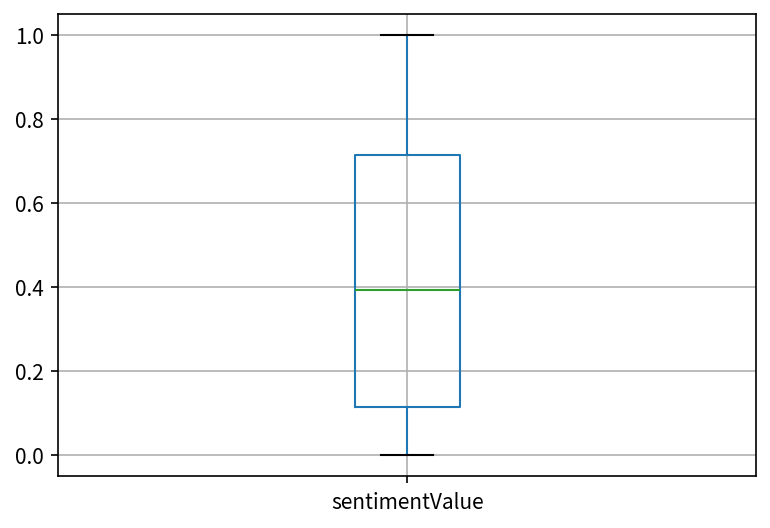

In [55]:
# 情緒分布的盒狀圖
boxplot = nlp_sent_df.boxplot(column=['sentimentValue'], showfliers=False)
boxplot

將每個月的情緒分數取平均，並轉換時間格式為年月

In [56]:
sent_date = nlp_sent_df.copy()
sent_date['artDate'] =  pd.to_datetime(nlp_sent_df['artDate']).dt.to_period('M')

sentiment_count = sent_date.groupby(['artDate'])['sentimentValue'].mean().reset_index()
sentiment_count

artDate  sentimentValue
0   2022-02        0.414945
1   2022-03        0.425546
2   2022-04        0.429951
3   2022-05        0.424657
4   2022-06        0.412430
5   2022-07        0.422052
6   2022-08        0.421934
7   2022-09        0.427864
8   2022-10        0.433763
9   2022-11        0.413360
10  2022-12        0.411384
11  2023-01        0.428219
12  2023-02        0.416657
13  2023-03        0.427846
14  2023-04        0.440444
15  2023-05        0.437909
16  2023-06        0.420975
17  2023-07        0.440307
18  2023-08        0.411674
19  2023-09        0.423295
20  2023-10        0.458001
21  2023-11        0.431428
22  2023-12        0.451821
23  2024-01        0.438423
24  2024-02        0.413392
25  2024-03        0.407450
26  2024-04        0.421923
27  2024-05        0.426931
28  2024-06        0.423695
29  2024-07        0.429382
30  2024-08        0.410924
31  2024-09        0.423714
32  2024-10        0.421905
33  2024-11        0.466336
34  2024-12        0.470391
35  2025-01        0.442717
36  2025-02        0.450533
37  2025-03        0.451498
38  2025-04        0.454331
39  2025-05        0.443090

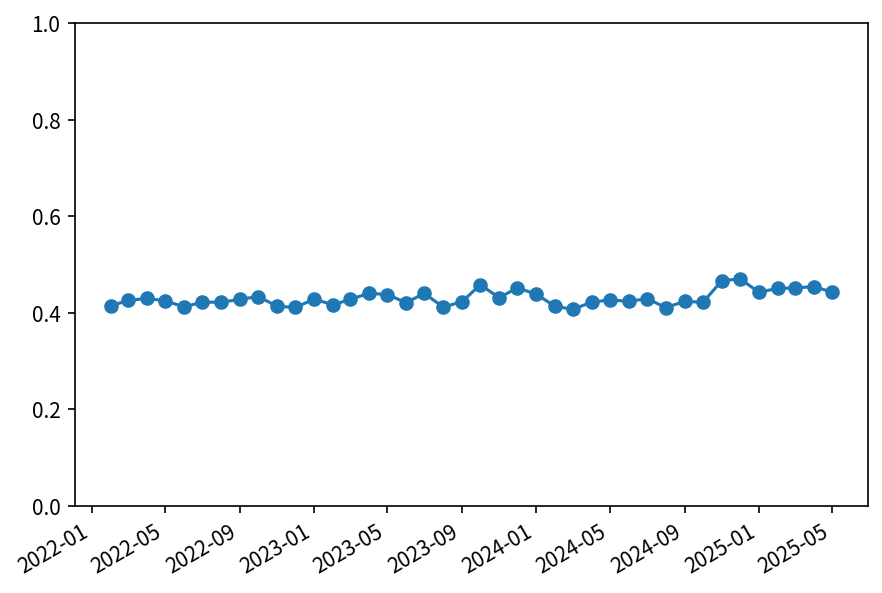

In [57]:
# 平均情緒分數時間趨勢
months = [period.to_timestamp() for period in sentiment_count['artDate']]   # 將 PeriodIndex 中的每個 Period 物件轉換為對應的 datetime 物件
y = sentiment_count['sentimentValue']

plt.plot_date(months, y, linestyle='solid')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.ylim(0, 1)

plt.show()

情緒值集中在0.4~0.5之間，整體在PTT八卦版的討論偏向負面。    

推測原因為:
- 俄羅斯和烏克蘭的衝突是一個複雜且涵蓋多面向的問題，究竟俄羅斯為什麼要入侵烏克蘭，並沒有一個明確的答案。但是PTT上看到的,大多是傾向討厭戰爭。  

- PTT八卦版上多樣化的觀點：因為PTT八卦版上擁有各式各樣的用戶，每個用戶都以自己的觀點發表意見。這種觀點的多樣性可能導致正面、負面和中性**情感表達的混合**。

### 3.2 負面詞彙文字雲

根據上圖的觀察，我們發現2024年3月的情緒值僅有0.4，相對低，因此我們挑出它來分析。

把這個月情緒負面句子挑出來看看他們都用甚麼詞。

In [58]:
# 篩時間
filter_sentiment = sent_date[sent_date['artDate']=='2024-03']
filter_sentiment = filter_sentiment.loc[filter_sentiment['sentimentValue'] < 0.4]

filter_sentiment.head(10)

system_id  artDate                           sentence sentiment_class  \
308953       2889  2024-03                           1媒體來源風傳媒              負向   
308955       2889  2024-03  3完整新聞標題若台海戰爭開打台灣一定比烏克蘭還慘　陳文茜揭殘酷現實              負向   
308956       2889  2024-03       4完整新聞內文俄羅斯於2年前的2月24日以武力入侵烏克蘭              負向   
308957       2889  2024-03                         戰事開打至今仍未停歇              負向   
308958       2889  2024-03                     不少人認為烏克蘭已進入消耗戰              負向   
308959       2889  2024-03                   對於俄烏戰爭2周年帶給台灣的啟示              負向   
308960       2889  2024-03                         資深媒體人陳文茜表示              負向   
308963       2889  2024-03                 加上台灣在過去歷史是服從性很高的地區              負向   
308964       2889  2024-03                            若台海戰爭開打              負向   
308965       2889  2024-03                         台灣一定比烏克蘭還慘              負向   

        sentimentValue  
308953        0.021956  
308955        0.003296  
308956        0.043294  
308957        0.018465  
308958        0.022206  
308959        0.051189  
308960        0.379309  
308963        0.078299  
308964        0.239384  
308965        0.367097

In [59]:
#把2024-3月的句子進行斷詞
day_word_df = filter_sentiment.assign(word = sent_df['sentence'].apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)

#去除少於兩個字的詞語
day_word_df = day_word_df.loc[day_word_df['word'].str.len() > 1]

day_word_df.head()

system_id  artDate sentiment_class  sentimentValue word
308953       2889  2024-03              負向        0.021956   媒體
308953       2889  2024-03              負向        0.021956   來源
308953       2889  2024-03              負向        0.021956  風傳媒
308955       2889  2024-03              負向        0.003296   完整
308955       2889  2024-03              負向        0.003296   新聞

繪製負面詞彙文字雲

In [60]:
# 自定停用字
with open('./dict/stop_words.txt', encoding='utf-8') as f:
    stop_words = f.read().splitlines()

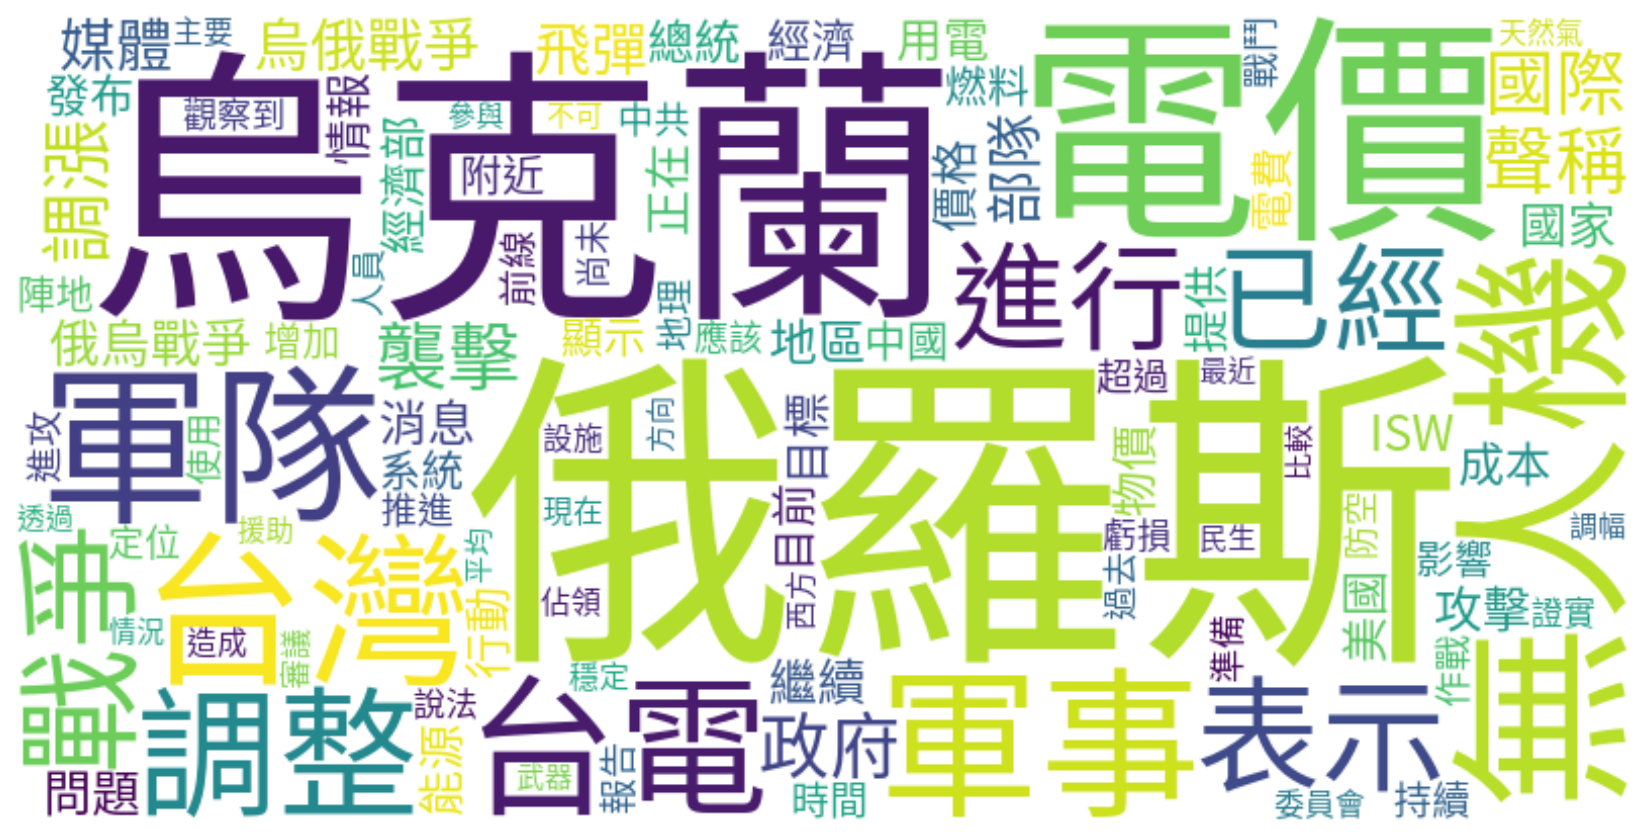

In [61]:
stop_words_pos = stop_words
stop_words_pos = set(stop_words_pos)
# 設定中文字形
font_path = 'SourceHanSansTW-Regular.otf'

# 可以設定字型大小和背景顏色
wordcloud = WordCloud(
                stopwords=stop_words_pos,
                collocations=False,
                font_path=font_path,
                width=800,
                height = 400,
                max_words=100,
                background_color="white")

wordcloud.generate(' '.join(day_word_df['word']))
# Display the generated image:
plt.figure(figsize = (14,7))
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.show()

可以看出負面詞彙文字雲出現了 **俄羅斯、烏克蘭、電價** 等詞彙，比較特別的是，我們針對的是俄烏戰爭，為何會出現電價，所以我們查詢2024-3 的新聞，發現了:  
- 台灣電力公司113年電價調整公告
有一種推測認為，俄烏戰爭可能影響了台灣天然氣的採購來源。由於戰爭導致國際能源局勢緊張，台灣可能減少與俄羅斯的天然氣交易，轉而改向美國採購。然而，相較於俄羅斯，美國天然氣的採購成本普遍較高，因此此變化可能間接造成國內電價的調升。此類能源政策與國際情勢間的連動，值得進一步關注與探討。

另外，我們也可以看到該月負面文章時常提及的詞彙包括: 台電、戰爭、無人機、軍隊 .....等詞彙也時常被提及。

## 4.找出重要詞彙 - 以TF/IDF為例

### 4.1 TF/IDF

In [62]:
ptt_df_tfidf = df.copy()

# 去除一些不需要的欄位
ptt_df_tfidf = ptt_df_tfidf.drop(['artCatagory','artComment','e_ip','insertedDate','dataSource',], axis=1)

ptt_df_tfidf['artContent'] = ptt_df_tfidf['artContent'].astype(str)
# 只留下中文字
ptt_df_tfidf['sentence'] = ptt_df_tfidf['artContent'].apply(lambda x: re.sub('[^\u4e00-\u9fff]+', '',x))

ptt_df_tfidf.head(3)

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
1          2  https://www.ptt.cc/bbs/Gossiping/M.1645664873....   
2          3  https://www.ptt.cc/bbs/Gossiping/M.1645677360....   

                     artTitle     artDate  artPoster  \
0     [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24  avexgroup   
1  Re:[問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24  BleedWang   
2              [問卦]共產黨會打共產黨嗎？  2022-02-24     Dubroy   

                                          artContent  \
0  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   
1  怎麽支援？？\n\n中華民國國軍 可以拿來運輸的載具\n\n只有C-130 而且還是商用版 ...   
2  假設對岸趁俄烏戰爭\n想要教訓一下美國的小弟\n這時候美國小弟跳出來說\n我跟你一樣是共產黨...   

                                            sentence  
0  大家好烏克蘭俄羅斯戰爭一觸即發中華民國台灣一向很熱心想積極參與國際事務軍力排名也是全球第維基...  
1  怎麽支援中華民國國軍可以拿來運輸的載具只有而且還是商用版沒有任何自衛裝置飛到三寶顏附近隨便一...  
2  假設對岸趁俄烏戰爭想要教訓一下美國的小弟這時候美國小弟跳出來說我跟你一樣是共產黨啊自己人不打...

In [63]:
ip_df = ptt_df_tfidf.copy()
ip_df['system_id']= range (1,len(ip_df)+1)
ip_df.head()

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
1          2  https://www.ptt.cc/bbs/Gossiping/M.1645664873....   
2          3  https://www.ptt.cc/bbs/Gossiping/M.1645677360....   
3          4  https://www.ptt.cc/bbs/Gossiping/M.1645677956....   
4          5  https://www.ptt.cc/bbs/Gossiping/M.1645678395....   

                     artTitle     artDate     artPoster  \
0     [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24     avexgroup   
1  Re:[問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24     BleedWang   
2              [問卦]共產黨會打共產黨嗎？  2022-02-24        Dubroy   
3           [問卦]台灣民眾對烏俄戰爭的態度？  2022-02-24  generalfungi   
4          [問卦]大家想像的戰爭是不是太誇張了  2022-02-24  Schrodingers   

                                          artContent  \
0  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   
1  怎麽支援？？\n\n中華民國國軍 可以拿來運輸的載具\n\n只有C-130 而且還是商用版 ...   
2  假設對岸趁俄烏戰爭\n想要教訓一下美國的小弟\n這時候美國小弟跳出來說\n我跟你一樣是共產黨...   
3  1\n\n打仗不好，會死人，希望儘快結束\n\n\n2\n\n希望越慘越好，血流成河更爽，最...   
4  看板上一堆人在討論烏俄戰爭 即將爆發\n\n\n八成都是腦補 城市陷入煉獄火焰之中吧\n\n...   

                                            sentence  
0  大家好烏克蘭俄羅斯戰爭一觸即發中華民國台灣一向很熱心想積極參與國際事務軍力排名也是全球第維基...  
1  怎麽支援中華民國國軍可以拿來運輸的載具只有而且還是商用版沒有任何自衛裝置飛到三寶顏附近隨便一...  
2  假設對岸趁俄烏戰爭想要教訓一下美國的小弟這時候美國小弟跳出來說我跟你一樣是共產黨啊自己人不打...  
3  打仗不好會死人希望儘快結束希望越慘越好血流成河更爽最好變成三戰反正看戲不怕台高日子那麼無聊有...  
4  看板上一堆人在討論烏俄戰爭即將爆發八成都是腦補城市陷入煉獄火焰之中吧然後城市被打得稀巴爛事實...

In [64]:
# 設定繁體中文詞庫
jieba.set_dictionary('./dict/dict.txt')

# 新增stopwords
with open('./dict/stop_words.txt',encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]

In [65]:
# 設定斷詞 function
def getToken(row):
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopWords and len(w)>1] # 篩選掉停用字與字元數小於1的詞彙

    return seg_list

In [66]:
# 保留需要的欄位
ip_df = ip_df.loc[:,["system_id", "sentence"]]

# 改成使用空格連接斷完的詞
ip_df['word'] = ip_df.sentence.apply(getToken).map(' '.join)
ip_df.head()


Building prefix dict from /content/drive/MyDrive/Colab Notebooks/dict/dict.txt ...
DEBUG:jieba:Building prefix dict from /content/drive/MyDrive/Colab Notebooks/dict/dict.txt ...
Loading model from cache /tmp/jieba.u1f64abcd0d28f6f22fb3b708af675734.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.u1f64abcd0d28f6f22fb3b708af675734.cache
Loading model cost 0.777 seconds.
DEBUG:jieba:Loading model cost 0.777 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


system_id                                           sentence  \
0          1  大家好烏克蘭俄羅斯戰爭一觸即發中華民國台灣一向很熱心想積極參與國際事務軍力排名也是全球第維基...   
1          2  怎麽支援中華民國國軍可以拿來運輸的載具只有而且還是商用版沒有任何自衛裝置飛到三寶顏附近隨便一...   
2          3  假設對岸趁俄烏戰爭想要教訓一下美國的小弟這時候美國小弟跳出來說我跟你一樣是共產黨啊自己人不打...   
3          4  打仗不好會死人希望儘快結束希望越慘越好血流成河更爽最好變成三戰反正看戲不怕台高日子那麼無聊有...   
4          5  看板上一堆人在討論烏俄戰爭即將爆發八成都是腦補城市陷入煉獄火焰之中吧然後城市被打得稀巴爛事實...   

                                                word  
0  烏克蘭 俄羅斯 戰爭 一觸即發 中華民國 台灣 一向 熱心 積極 參與 國際 事務 軍力 排...  
1  支援 中華民國 國軍 拿來 運輸 載具 商用版 自衛 裝置 飛到 三寶 附近 隨便 賓賓 偷...  
2  假設 對岸 俄烏 戰爭 想要 教訓 一下 美國 小弟 美國 小弟 跳出來 共產黨 自己人 自...  
3  打仗 不好 死人 希望 結束 希望 慘越 血流成河 更爽 最好 變成 三戰 反正 看戲 日子...  
4  看板 一堆 討論 烏俄 戰爭 爆發 腦補 城市 陷入 煉獄 火焰 之中 城市 稀巴爛 事實 ...

In [67]:
# Bag of Word
vectorizer = CountVectorizer(max_features=1000)  # 限制特徵數量為1000
X = vectorizer.fit_transform(ip_df["word"])
vocabulary = vectorizer.get_feature_names_out()

# 轉成 dataframe
DTM_df = pd.DataFrame(columns = vocabulary, data = X.toarray())
DTM_df

一下  一些  一位  一名  一堆  一場  一天  一定  一年  一架  ...  飛機  首次  香港  馬克宏  馬斯  馬英九  \
0       0   0   0   0   0   0   0   0   0   0  ...   0   0   0    0   0    0   
1       0   0   0   0   0   0   0   0   0   0  ...   0   0   0    0   0    0   
2       1   0   0   0   0   0   0   0   0   0  ...   0   0   0    0   0    0   
3       0   0   0   0   0   0   0   0   0   0  ...   0   0   0    0   0    0   
4       0   0   0   0   1   0   0   0   0   0  ...   0   0   0    0   0    0   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ...  ..  ...   
12822   0   0   0   0   0   0   0   0   1   0  ...   0   0   0    0   0    0   
12823   1   0   0   0   0   0   0   0   0   0  ...   0   0   0    0   0    0   
12824   0   0   0   0   0   0   0   0   0   0  ...   0   0   0    0   0    0   
12825   0   0   0   1   0   0   0   1   0   0  ...   0   0   0    0   0    2   
12826   0   0   0   0   0   2   0   0   0   0  ...   0   0   0    0   0    0   

       高層  高度  高級  黑海  
0       0   0   0   0  
1       0   0   0   0  
2       0   0   0   0  
3       0   0   0   0  
4       0   0   0   0  
...    ..  ..  ..  ..  
12822   0   0   0   0  
12823   0   0   0   0  
12824   0   0   0   0  
12825   0   0   0   0  
12826   0   0   0   0  

[12827 rows x 1000 columns]

In [68]:
transformer = TfidfTransformer()
# 將詞頻矩陣X統計成TF-IDF值
tfidf = transformer.fit_transform(X)

# 轉成dataframe
TFIDF_df = pd.DataFrame(columns = vocabulary, data = tfidf.toarray())

TFIDF_df

一下   一些   一位        一名       一堆        一場   一天        一定  \
0      0.000000  0.0  0.0  0.000000  0.00000  0.000000  0.0  0.000000   
1      0.000000  0.0  0.0  0.000000  0.00000  0.000000  0.0  0.000000   
2      0.379138  0.0  0.0  0.000000  0.00000  0.000000  0.0  0.000000   
3      0.000000  0.0  0.0  0.000000  0.00000  0.000000  0.0  0.000000   
4      0.000000  0.0  0.0  0.000000  0.19365  0.000000  0.0  0.000000   
...         ...  ...  ...       ...      ...       ...  ...       ...   
12822  0.000000  0.0  0.0  0.000000  0.00000  0.000000  0.0  0.000000   
12823  0.136071  0.0  0.0  0.000000  0.00000  0.000000  0.0  0.000000   
12824  0.000000  0.0  0.0  0.000000  0.00000  0.000000  0.0  0.000000   
12825  0.000000  0.0  0.0  0.008331  0.00000  0.000000  0.0  0.006568   
12826  0.000000  0.0  0.0  0.000000  0.00000  0.119295  0.0  0.000000   

             一年   一架  ...   飛機   首次   香港  馬克宏   馬斯       馬英九   高層   高度   高級  \
0      0.000000  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
1      0.000000  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
2      0.000000  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
3      0.000000  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
4      0.000000  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
...         ...  ...  ...  ...  ...  ...  ...  ...       ...  ...  ...  ...   
12822  0.101543  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
12823  0.000000  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
12824  0.000000  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
12825  0.000000  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.020242  0.0  0.0  0.0   
12826  0.000000  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   

        黑海  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
...    ...  
12822  0.0  
12823  0.0  
12824  0.0  
12825  0.0  
12826  0.0  

[12827 rows x 1000 columns]

### 4.2 檢視結果

In [69]:
toptens = TFIDF_df.copy()
toptens.insert(0, 'doc_id', toptens.index+1)

toptens

doc_id        一下   一些   一位        一名       一堆        一場   一天        一定  \
0           1  0.000000  0.0  0.0  0.000000  0.00000  0.000000  0.0  0.000000   
1           2  0.000000  0.0  0.0  0.000000  0.00000  0.000000  0.0  0.000000   
2           3  0.379138  0.0  0.0  0.000000  0.00000  0.000000  0.0  0.000000   
3           4  0.000000  0.0  0.0  0.000000  0.00000  0.000000  0.0  0.000000   
4           5  0.000000  0.0  0.0  0.000000  0.19365  0.000000  0.0  0.000000   
...       ...       ...  ...  ...       ...      ...       ...  ...       ...   
12822   12823  0.000000  0.0  0.0  0.000000  0.00000  0.000000  0.0  0.000000   
12823   12824  0.136071  0.0  0.0  0.000000  0.00000  0.000000  0.0  0.000000   
12824   12825  0.000000  0.0  0.0  0.000000  0.00000  0.000000  0.0  0.000000   
12825   12826  0.000000  0.0  0.0  0.008331  0.00000  0.000000  0.0  0.006568   
12826   12827  0.000000  0.0  0.0  0.000000  0.00000  0.119295  0.0  0.000000   

             一年  ...   飛機   首次   香港  馬克宏   馬斯       馬英九   高層   高度   高級   黑海  
0      0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  
1      0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  
2      0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  
3      0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  
4      0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  
...         ...  ...  ...  ...  ...  ...  ...       ...  ...  ...  ...  ...  
12822  0.101543  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  
12823  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  
12824  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  
12825  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.020242  0.0  0.0  0.0  0.0  
12826  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  

[12827 rows x 1001 columns]

In [70]:
toptens = toptens.melt(id_vars = "doc_id", var_name = "word", value_name = 'tfidf')
toptens

doc_id word     tfidf
0              1   一下  0.000000
1              2   一下  0.000000
2              3   一下  0.379138
3              4   一下  0.000000
4              5   一下  0.000000
...          ...  ...       ...
12826995   12823   黑海  0.000000
12826996   12824   黑海  0.000000
12826997   12825   黑海  0.000000
12826998   12826   黑海  0.000000
12826999   12827   黑海  0.000000

[12827000 rows x 3 columns]

In [71]:
(
    # 從每篇文章挑選出tf-idf最大的前十個詞
    toptens.groupby("doc_id").apply(lambda x : x.nlargest(10, "tfidf")).reset_index(drop=True)

    # 計算每個詞被選中的次數
    .groupby(['word'],as_index=False).size()

).sort_values('size', ascending=False).head(10) # 排序看前十名

<ipython-input-71-1a4971485870>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  toptens.groupby("doc_id").apply(lambda x : x.nlargest(10, "tfidf")).reset_index(drop=True)


word  size
620  烏克蘭  2807
218   台灣  2403
102  俄羅斯  2163
754   美國  2073
33    中國  1880
424   戰爭  1447
0     一下  1209
1     一些   834
643   現在   817
32    中共   647

- 可以看到烏克蘭、俄羅斯、美國都顯現在列表上。
- 列表也出現了台灣、美國、中國等關鍵字，可能顯示烏俄戰爭會對台灣、中國與美國的關係會有一定的影響。

## 5.透過結巴斷詞與N-gram幫助建立斷詞字典

In [72]:
# 設定 ngram 斷詞 function
def ngram_getToken(row, n):
    # 進行斷詞
    seg_list = jieba.lcut(row)

    # 篩選掉停用字與字元數小於1的詞彙
    seg_list = [w for w in seg_list if w not in stopWords and len(w)>1]

    # ngram斷詞
    seg_list = ngrams(seg_list, n)
    seg_list = [" ".join(w) for w in list(seg_list)]

    return seg_list

### 5.1 Bigram

In [73]:
ip_bigram = ptt_df_tfidf.copy()

#ip_bigram['sentence'] = ip_bigram['sentence'].astype(str)
ip_bigram["word"] = ip_bigram['sentence'].apply(lambda row: ngram_getToken(row, 2))
ip_bigram = ip_bigram.explode('word')
ip_bigram.head()

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
0          1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
0          1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
0          1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
0          1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   

                  artTitle     artDate  artPoster  \
0  [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24  avexgroup   
0  [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24  avexgroup   
0  [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24  avexgroup   
0  [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24  avexgroup   
0  [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24  avexgroup   

                                          artContent  \
0  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   
0  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   
0  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   
0  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   
0  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   

                                            sentence       word  
0  大家好烏克蘭俄羅斯戰爭一觸即發中華民國台灣一向很熱心想積極參與國際事務軍力排名也是全球第維基...    烏克蘭 俄羅斯  
0  大家好烏克蘭俄羅斯戰爭一觸即發中華民國台灣一向很熱心想積極參與國際事務軍力排名也是全球第維基...     俄羅斯 戰爭  
0  大家好烏克蘭俄羅斯戰爭一觸即發中華民國台灣一向很熱心想積極參與國際事務軍力排名也是全球第維基...    戰爭 一觸即發  
0  大家好烏克蘭俄羅斯戰爭一觸即發中華民國台灣一向很熱心想積極參與國際事務軍力排名也是全球第維基...  一觸即發 中華民國  
0  大家好烏克蘭俄羅斯戰爭一觸即發中華民國台灣一向很熱心想積極參與國際事務軍力排名也是全球第維基...    中華民國 台灣

統計最常出現的bigram組合

In [74]:
# 計算每個組合出現的次數
ip_bigram_count = ip_bigram['word'].value_counts().reset_index()

ip_bigram_count.sort_values('count', ascending=False).head(20)

word  count
0     俄烏 戰爭   8412
1    俄羅斯 軍隊   8255
2     烏俄 戰爭   3661
3    烏克蘭 軍隊   3084
4     澤倫 斯基   2267
5     不可 媒體   2110
6   俄羅斯 烏克蘭   1428
7   俄羅斯 國防部   1364
8     哈爾 科夫   1193
9    俄羅斯 軍事   1183
10   俄羅斯 消息   1137
11   入侵 烏克蘭   1119
12    戰爭 爆發   1118
13   烏克蘭 總統   1095
14    地理 定位   1084
15    美國 總統   1049
16    軍隊 最近   1039
17   消息 俄羅斯   1032
18   表示 俄羅斯   1026
19   俄羅斯 總統   1022

- 列表中的「俄烏戰爭」、「烏俄戰爭」皆已加入斷詞詞典
- 另外將列表中的「俄羅斯」、「烏克蘭」也新增至斷詞詞典

### 5.2 Bigram視覺化

使用自建詞典

In [75]:
# 新增相關自定義字典
jieba.load_userdict('./dict/my_dict.txt')

In [76]:
# 剛才的斷詞結果沒有使用新增的辭典，因此我們重新進行斷詞
data2 = ptt_df_tfidf.copy()
data2['word'] = data2.sentence.apply(getToken)
data2 = data2.explode('word')

data2.head(3)

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
0          1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
0          1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   

                  artTitle     artDate  artPoster  \
0  [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24  avexgroup   
0  [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24  avexgroup   
0  [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24  avexgroup   

                                          artContent  \
0  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   
0  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   
0  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   

                                            sentence word  
0  大家好烏克蘭俄羅斯戰爭一觸即發中華民國台灣一向很熱心想積極參與國際事務軍力排名也是全球第維基...  烏克蘭  
0  大家好烏克蘭俄羅斯戰爭一觸即發中華民國台灣一向很熱心想積極參與國際事務軍力排名也是全球第維基...  俄羅斯  
0  大家好烏克蘭俄羅斯戰爭一觸即發中華民國台灣一向很熱心想積極參與國際事務軍力排名也是全球第維基...   戰爭

In [77]:
bigramudist = ptt_df_tfidf.copy()

bigramudist["word"] = bigramudist['sentence'].apply(lambda row: ngram_getToken(row, 2))
bigramudist = bigramudist.explode('word')
bigramudist.dropna(subset = ['word'], axis=0, how='any', inplace=True)

bigramudist.head(3)

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
0          1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
0          1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   

                  artTitle     artDate  artPoster  \
0  [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24  avexgroup   
0  [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24  avexgroup   
0  [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24  avexgroup   

                                          artContent  \
0  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   
0  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   
0  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   

                                            sentence     word  
0  大家好烏克蘭俄羅斯戰爭一觸即發中華民國台灣一向很熱心想積極參與國際事務軍力排名也是全球第維基...  烏克蘭 俄羅斯  
0  大家好烏克蘭俄羅斯戰爭一觸即發中華民國台灣一向很熱心想積極參與國際事務軍力排名也是全球第維基...   俄羅斯 戰爭  
0  大家好烏克蘭俄羅斯戰爭一觸即發中華民國台灣一向很熱心想積極參與國際事務軍力排名也是全球第維基...  戰爭 一觸即發

In [78]:
bigramudist['word'] = bigramudist['word'].astype(str)

# 使用FreqDist 取得 bigram 斷詞 與 bigram出現頻率
bigramudist = FreqDist(bigramudist['word'].apply(lambda x: tuple(x.split(' '))))
bigramudist.most_common(5)

[(('俄羅斯', '軍隊'), 8255),
 (('烏克蘭', '軍隊'), 3084),
 (('不可', '媒體'), 2110),
 (('俄羅斯', '烏克蘭'), 1428),
 (('俄羅斯', '國防部'), 1364)]

In [79]:
# 建立bigram和count的dictionary
# 這裡取最多的前50項
d = {k:v for k,v in bigramudist.most_common(50)}

In [80]:
# Create network plot
G = nx.Graph()

# 建立 nodes 間的連結
for k, v in [d][0].items():
    G.add_edge(k[0], k[1], weight=v) # nodes：詞彙，weight：組合出現頻率

# 取得edge權重
weights = [w[2]['weight']*0.01 for w in  G.edges(data=True)]

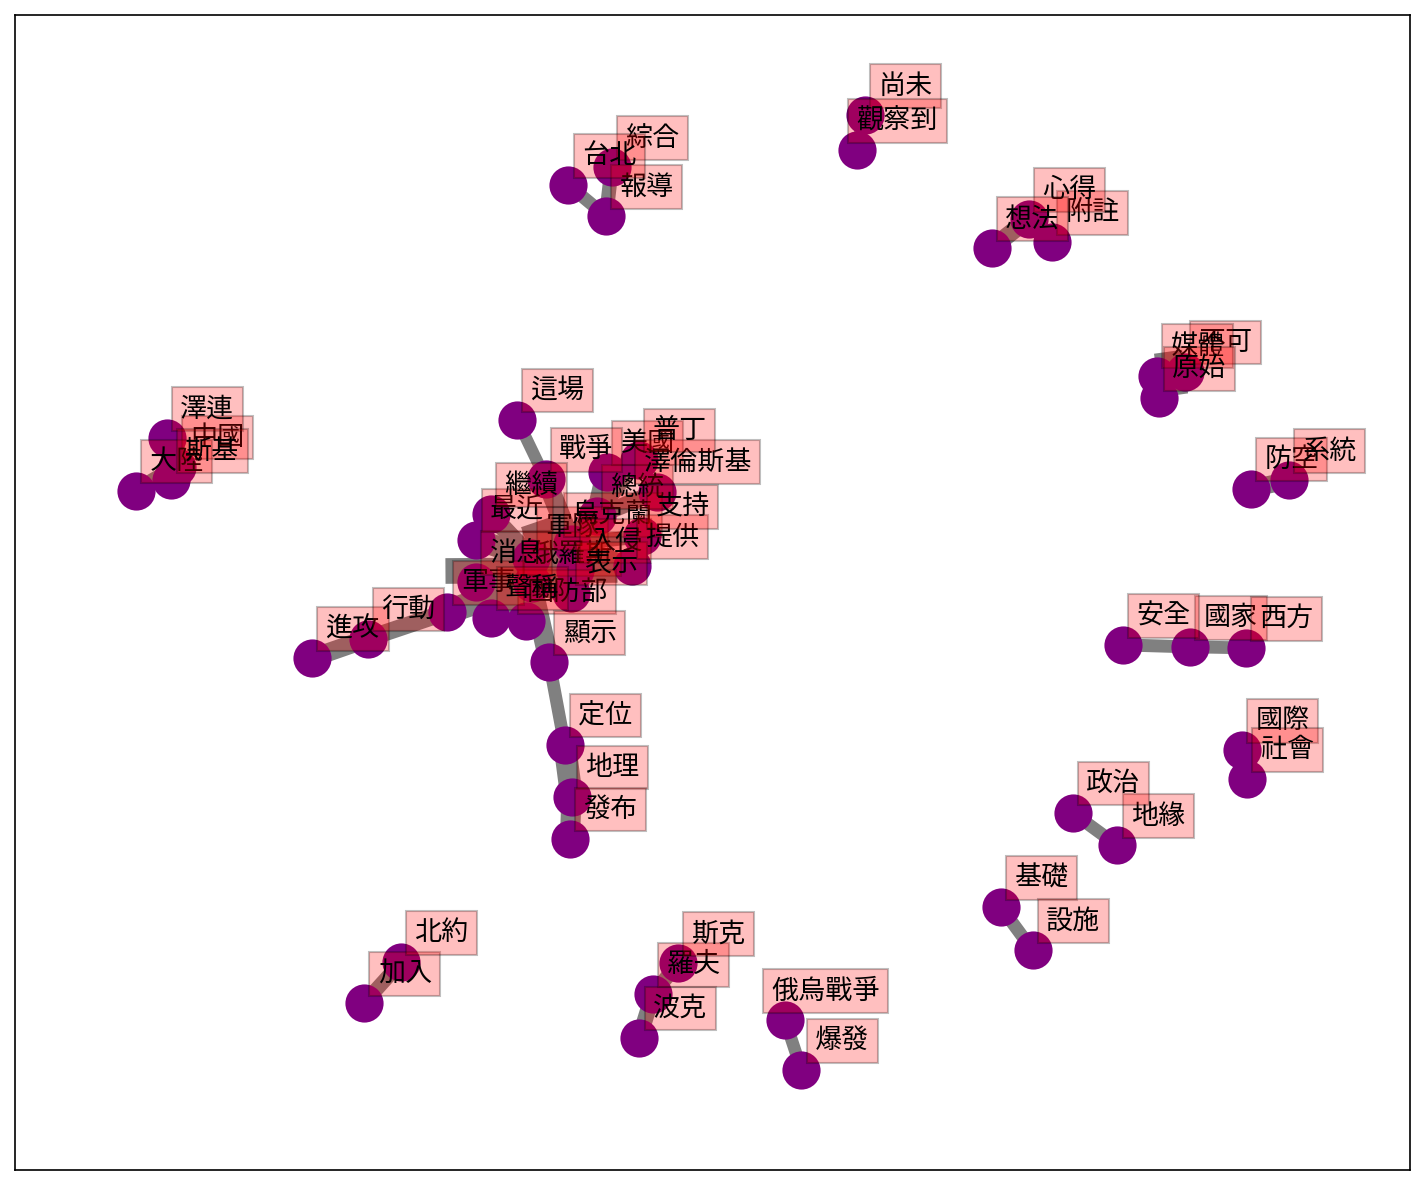

In [81]:
fig, ax = plt.subplots(figsize=(12, 10))

pos = nx.spring_layout(G, k=1.5)

# networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=weights,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# 增加 labels
for key, value in pos.items():
    x, y = value[0]+.07, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)

plt.show()

**網路圖分析**

- 從圖中可觀察到多個主題群聚現象。例如，以「俄烏戰爭」、「爆發」、「國際」、「社
會」等為核心的群組，反映了文本中針對戰爭發生與全球影響的高度關聯討論；而「美國」、「軍事」、「普丁」、「燃料」、「能源」、「提供」等則形成另一個以軍事援助與能源政策為主的語意群組。此外，「中國」、「大陸」、「社會」、「斯基」、「羅斯克」等詞彙則出現在較邊緣的位置，顯示其參與討論頻率較低或僅在特定語境中出現。

- 圖中也可見部分與北約相關的字詞，如「北約」、「加入」、「安全」、「國家」、「西方」，雖分布較為分散，卻形成一個具有明確主題輪廓的小型子群，顯示雖然北約在整體文本中並非最核心議題，但仍在特定語境中構成獨立且具有邏輯連貫性的語意場域。

- 進一步觀察圖像結構可以發現，圖像左上方的詞彙群（如「波克羅夫斯克」、「斯基」、「澤倫斯基」等）可能對應與烏克蘭特定地區或領土相關的討論；左方則呈現包含「北約」、「加入」、「西方」、「安全」等字詞的群體，顯示可能與西方國家角色、地緣安全等相關的主題文章。

- 而圖像正中央則可視為整體俄烏戰爭語意網絡的軸心，包含「普丁」、「川普」、「澤倫斯基」、「俄羅斯」、「軍事」、「進攻」等核心關鍵詞，顯示為集中探討戰爭主體與領導人角色的核心語境。

- 此外，圖像右上方則有一群以「國際」、「社會」、「爆發」、「聯合國」等為主的詞彙群，可能對應探討國際社會對俄烏戰爭所展現關注與態度的文章內容。

## 6.Pairwise correlation

計算兩個詞彙間的相關性 Pearson correlation

In [82]:
data_cor = ptt_df_tfidf.copy()

# 需要改成使用空格連接斷好的詞
data_cor['word'] = data_cor.sentence.apply(getToken).map(' '.join)
data_cor.head(3)

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Gossiping/M.1645663423....   
1          2  https://www.ptt.cc/bbs/Gossiping/M.1645664873....   
2          3  https://www.ptt.cc/bbs/Gossiping/M.1645677360....   

                     artTitle     artDate  artPoster  \
0     [問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24  avexgroup   
1  Re:[問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？  2022-02-24  BleedWang   
2              [問卦]共產黨會打共產黨嗎？  2022-02-24     Dubroy   

                                          artContent  \
0  大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...   
1  怎麽支援？？\n\n中華民國國軍 可以拿來運輸的載具\n\n只有C-130 而且還是商用版 ...   
2  假設對岸趁俄烏戰爭\n想要教訓一下美國的小弟\n這時候美國小弟跳出來說\n我跟你一樣是共產黨...   

                                            sentence  \
0  大家好烏克蘭俄羅斯戰爭一觸即發中華民國台灣一向很熱心想積極參與國際事務軍力排名也是全球第維基...   
1  怎麽支援中華民國國軍可以拿來運輸的載具只有而且還是商用版沒有任何自衛裝置飛到三寶顏附近隨便一...   
2  假設對岸趁俄烏戰爭想要教訓一下美國的小弟這時候美國小弟跳出來說我跟你一樣是共產黨啊自己人不打...   

                                                word  
0  烏克蘭 俄羅斯 戰爭 一觸即發 中華民國 台灣 一向 熱心 積極 參與 國際 事務 軍力 排...  
1  支援 中華民國 國軍 拿來 運輸 載具 商用版 自衛 裝置 飛到 三寶 附近 隨便 賓賓 偷...  
2  假設 對岸 俄烏戰爭 想要 教訓 一下 美國 小弟 美國 小弟 跳出來 共產黨 自己人 自己...

In [83]:
# Bag of Word
# 篩選至少出現在5篇文章以上且詞頻前300的詞彙
vectorizer = CountVectorizer(min_df = 5, max_features = 300)
X = vectorizer.fit_transform(data_cor["word"])
vocabulary = vectorizer.get_feature_names_out()

# 轉成dataframe
DTM_df = pd.DataFrame(columns = vocabulary, data = X.toarray())
DTM_df

一些  一定  一直  上漲  不可  不斷  世界  中共  中國  中心  ...  電價  需要  面對  面臨  韓國  預算  \
0       0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
1       0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
2       0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
3       0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
4       0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
12822   0   0   0   0   0   0   0   0   4   0  ...   0   0   1   0   0   0   
12823   0   0   1   0   0   0   0   0   1   0  ...   1   0   0   0   0   0   
12824   0   0   0   0   0   0   1   0   3   0  ...   0   0   0   0   0   0   
12825   0   1   5   0   0   2   4   5  16   0  ...   0   2   1   1   0   0   
12826   0   0   0   0   0   0   0   0   1   0  ...   0   2   0   1   0   0   

       領土  願意  顯示  飛彈  
0       0   0   0   0  
1       0   0   0   1  
2       0   0   0   0  
3       0   0   0   0  
4       0   0   0   1  
...    ..  ..  ..  ..  
12822   0   0   0   0  
12823   0   0   0   0  
12824   0   0   0   0  
12825   1   0   0   0  
12826   0   0   0   0  

[12827 rows x 300 columns]

In [84]:
# 計算詞之間的相關係數
corr_matrix = np.corrcoef(DTM_df.T)

# 轉成dataframe
Cor_df = pd.DataFrame(corr_matrix, index = DTM_df.columns, columns = DTM_df.columns)

Cor_df.insert(0, 'word1', Cor_df.columns)
Cor_df.reset_index(inplace = True, drop = True)

Cor_df

word1        一些        一定        一直        上漲        不可        不斷  \
0      一些  1.000000  0.090667  0.247407 -0.000065  0.109696  0.157246   
1      一定  0.090667  1.000000  0.122549  0.010458  0.036530  0.088673   
2      一直  0.247407  0.122549  1.000000 -0.005193  0.070483  0.186337   
3      上漲 -0.000065  0.010458 -0.005193  1.000000  0.077913  0.040266   
4      不可  0.109696  0.036530  0.070483  0.077913  1.000000  0.120321   
..    ...       ...       ...       ...       ...       ...       ...   
295    預算  0.038898  0.050680  0.060041  0.046772  0.055068  0.054142   
296    領土  0.240678  0.014490  0.180987 -0.023164  0.103674  0.142632   
297    願意  0.120123  0.086733  0.129658 -0.004091  0.075287  0.112784   
298    顯示  0.351969  0.013244  0.210519  0.014577  0.060446  0.176490   
299    飛彈  0.259708  0.016154  0.196494 -0.016353  0.022859  0.154824   

           世界        中共        中國  ...        電價        需要        面對  \
0    0.111973  0.165788  0.238633  ... -0.018224  0.290359  0.080706   
1    0.151506  0.149323  0.153273  ...  0.015702  0.100115  0.163929   
2    0.148614  0.191940  0.191112  ... -0.019212  0.238069  0.103357   
3   -0.020634 -0.024643 -0.035392  ...  0.146515  0.022242  0.018684   
4    0.114733  0.145655  0.125454  ...  0.062141  0.122878  0.119838   
..        ...       ...       ...  ...       ...       ...       ...   
295  0.042871 -0.001027  0.011155  ...  0.160776  0.100791  0.091459   
296  0.054753  0.059429  0.082473  ... -0.035660  0.274393  0.018392   
297  0.133560  0.042211  0.125217  ... -0.016675  0.166240  0.111567   
298  0.020691  0.017474  0.066974  ... -0.025642  0.285618  0.013043   
299  0.009210 -0.010871  0.022436  ... -0.029316  0.252264  0.004795   

           面臨        韓國        預算        領土        願意        顯示        飛彈  
0    0.192580  0.051984  0.038898  0.240678  0.120123  0.351969  0.259708  
1    0.062021  0.087551  0.050680  0.014490  0.086733  0.013244  0.016154  
2    0.116344  0.060612  0.060041  0.180987  0.129658  0.210519  0.196494  
3    0.059916  0.018075  0.046772 -0.023164 -0.004091  0.014577 -0.016353  
4    0.136929  0.044255  0.055068  0.103674  0.075287  0.060446  0.022859  
..        ...       ...       ...       ...       ...       ...       ...  
295  0.073354  0.018708  1.000000  0.031990  0.036851  0.086828  0.081604  
296  0.138484  0.006393  0.031990  1.000000  0.173732  0.419899  0.325975  
297  0.067192  0.017647  0.036851  0.173732  1.000000  0.156414  0.090381  
298  0.227806  0.054427  0.086828  0.419899  0.156414  1.000000  0.560784  
299  0.131821  0.023380  0.081604  0.325975  0.090381  0.560784  1.000000  

[300 rows x 301 columns]

In [85]:
word_cor_df = Cor_df.melt(id_vars = 'word1', var_name = 'word2', value_name = 'cor')

# 去除兩個詞相同的情況
word_cor_df = word_cor_df[word_cor_df["word1"] != word_cor_df["word2"]]

word_cor_df.sort_values('cor', ascending=False).head(10)

word1 word2       cor
79532   俄羅斯    軍隊  0.939228
9865     軍隊   俄羅斯  0.939228
55532   俄羅斯   烏克蘭  0.914760
9785    烏克蘭   俄羅斯  0.914760
86365    軍隊    附近  0.907912
79787    附近    軍隊  0.907912
86132   俄羅斯    附近  0.897018
9887     附近   俄羅斯  0.897018
9682     地區   俄羅斯  0.895086
24632   俄羅斯    地區  0.895086

In [86]:
ip_sum = word_cor_df[(word_cor_df["word1"] == "俄羅斯")].sort_values(by = ['cor'], ascending = False).head(10)
p_sum = word_cor_df[(word_cor_df["word1"] == "烏克蘭")].sort_values(by = ['cor'], ascending = False).head(10)

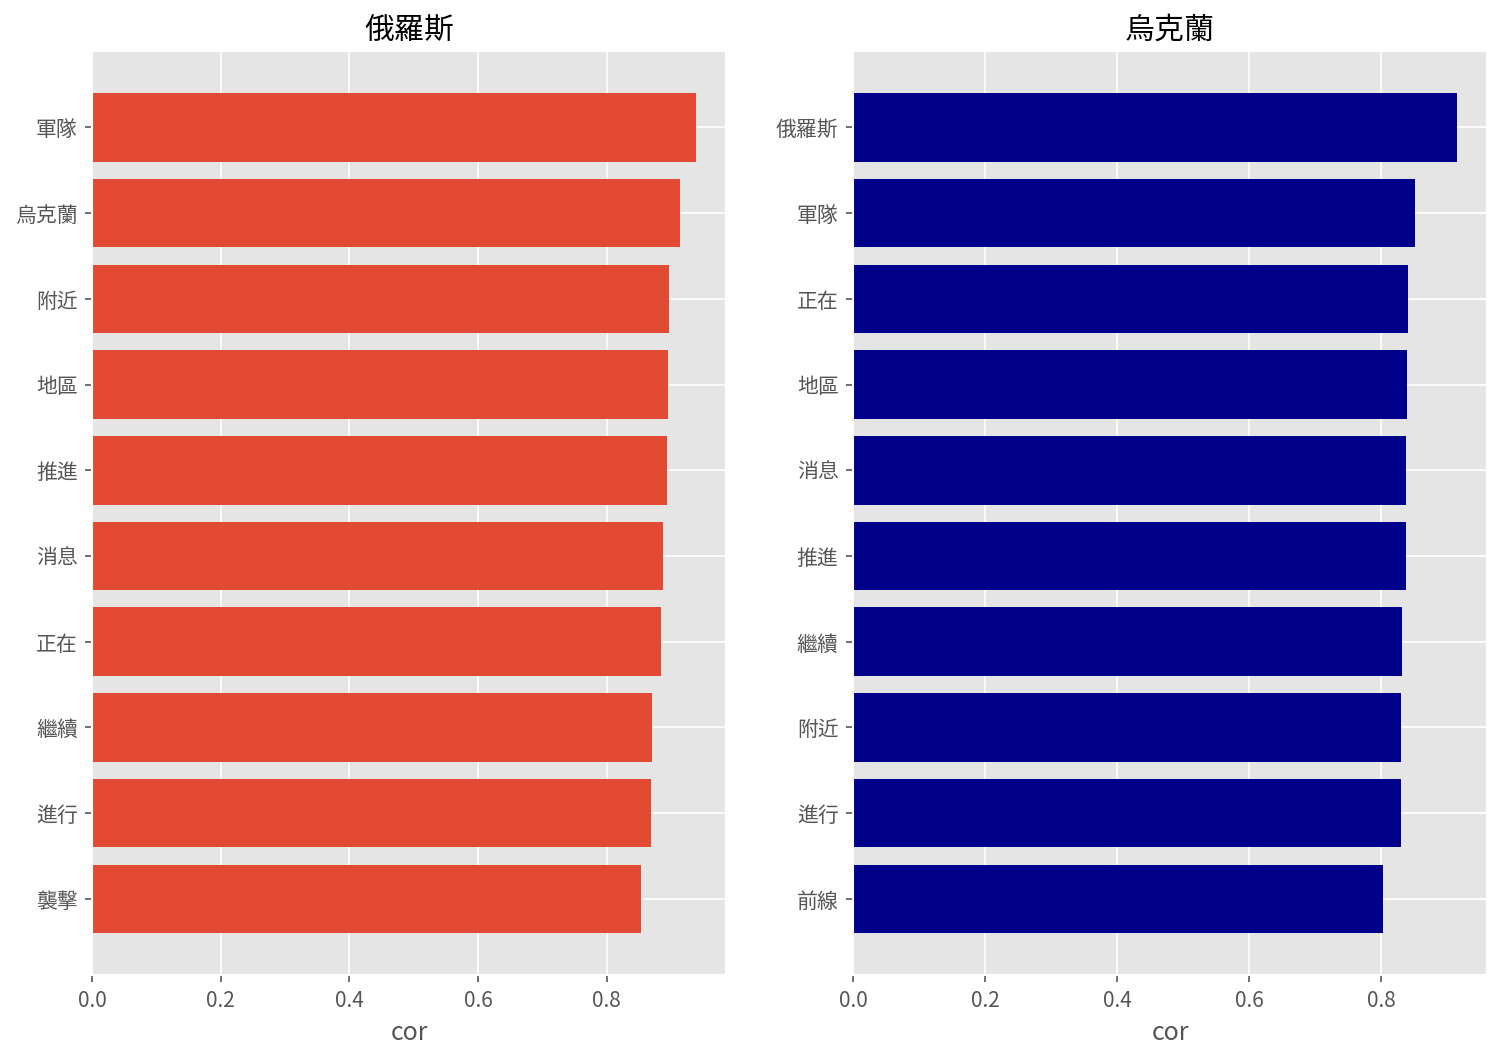

In [87]:
plt.figure(figsize=(12,8))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式

plt.subplot(121)
plt.title('俄羅斯')
plt.xlabel('cor')
plt.barh(ip_sum['word2'],ip_sum['cor'])
plt.gca().invert_yaxis()

plt.subplot(122)
plt.title('烏克蘭')
plt.xlabel('cor')
plt.barh(p_sum['word2'],p_sum['cor'],color="darkblue")
plt.gca().invert_yaxis()

plt.show()

- 「俄羅斯」、「烏克蘭」的相關關鍵字出現彼此的名稱，顯示了衝突對象、事件發生地區

### 6.1 使用詞彙關係圖畫出以詞頻前50為節點且相關性高於0.4的組合

In [88]:
# 透過DTM找出詞頻前60高的詞彙
most_freq_df = DTM_df.sum().sort_values(ascending=False).head(50).reset_index().rename(columns={'index':'word', 0:'count'})

most_freq_word = most_freq_df['word'].tolist()

In [89]:
# 保留存在詞頻前60高之詞彙的組合
filtered_df = word_cor_df[(word_cor_df['word1'].isin(most_freq_word)) & (word_cor_df['word2'].isin(most_freq_word))]

# 篩選出相關係數大於0.4的組合
filtered_df = filtered_df[filtered_df['cor'] > 0.4]
filtered_df.reset_index(inplace=True, drop=True)
filtered_df

word1 word2       cor
0      俄軍   俄羅斯  0.550322
1      地區   俄羅斯  0.895086
2      已經   俄羅斯  0.449528
3      持續   俄羅斯  0.532346
4      提供   俄羅斯  0.685582
..    ...   ...       ...
375    表示    飛彈  0.495233
376    軍事    飛彈  0.597011
377    軍隊    飛彈  0.644535
378    進行    飛彈  0.622047
379    部隊    飛彈  0.574808

[380 rows x 3 columns]

In [90]:
# Create network plot
g = nx.Graph()

# 建立 nodes 間的連結
for i in range(len(filtered_df)):
    g.add_edge(filtered_df["word1"][i], filtered_df["word2"][i], weight=filtered_df["cor"][i])

# 取得edge權重
weights = [w[2]['weight']*5 for w in  g.edges(data=True)]

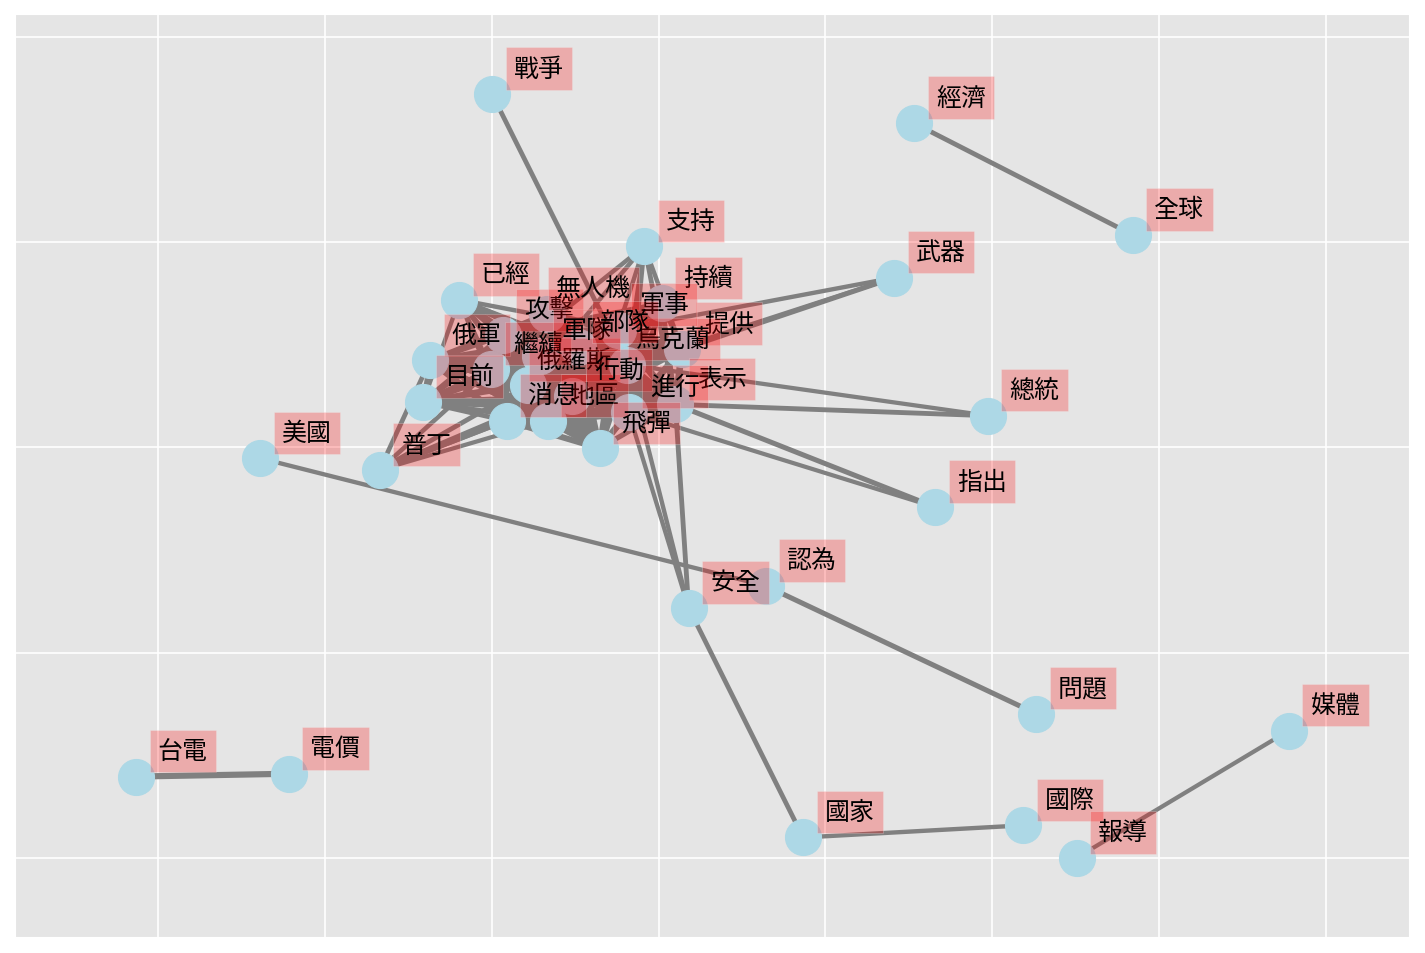

In [91]:
fig, ax = plt.subplots(figsize=(12, 8))

pos = nx.spring_layout(g, k=0.5)

# networks
nx.draw_networkx(g, pos,
                 font_size=16,
                 width=weights,
                 edge_color='grey',
                 node_color='lightblue',
                 with_labels = False,
                 ax=ax)

# 增加 labels
for key, value in pos.items():
    x, y = value[0]+.07, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=12)

plt.show()


- 圖中顯示除了探討事件發生的人事地物外，
PTT上也會討論到政治人物對此事件的立場及影響，
因此「俄羅斯」、「烏克蘭」、「軍隊」等詞彙都出現在圖表上了。
比較特別的是在2024-03時，因為台電調漲電價，所以連「電價」及「台電」 都出現在圖表上

## 7.建立Ngram預測模型

In [92]:
data3 = ptt_df_tfidf.copy()
sen_tokens = data3.sentence.apply(getToken).tolist()

In [93]:
def ngram(documents, N=2):
    ngram_prediction = dict()
    total_grams = list()
    words = list()
    Word = namedtuple('Word', ['word', 'prob'])

    for doc in documents:
        # 加上開頭和結尾 tag
        split_words = ['<s>'] + list(doc) + ['</s>']
        # 計算分子
        [total_grams.append(tuple(split_words[i:i+N])) for i in range(len(split_words)-N+1)]
        # 計算分母
        [words.append(tuple(split_words[i:i+N-1])) for i in range(len(split_words)-N+2)]

    total_word_counter = Counter(total_grams)
    word_counter = Counter(words)

    for key in total_word_counter:
        word = ''.join(key[:N-1])
        if word not in ngram_prediction:
            ngram_prediction.update({word: set()})

        next_word_prob = total_word_counter[key]/word_counter[key[:N-1]] #P(B|A)
        w = Word(key[-1], '{:.3g}'.format(next_word_prob))
        ngram_prediction[word].add(w)

    return ngram_prediction

In [94]:
# Bigram預測模型為例
bi_prediction = ngram(sen_tokens, N=2)

預測下一個出現的詞


In [95]:
text = '俄羅斯'
next_words = list(bi_prediction[text])
next_words.sort(key = lambda s: s[1], reverse = True)
for next_word in next_words[:5]:
    print('next word: {}, probability: {}'.format(next_word.word, next_word.prob))

next word: 供應商, probability: 8.55e-05
next word: 上限, probability: 8.55e-05
next word: 機構, probability: 8.55e-05
next word: 想法, probability: 8.55e-05
next word: 算是, probability: 8.55e-05


戰爭的預測詞出現了「記錄」、「撒離」等詞彙，即是戰爭在俄烏戰爭當中的代表形象

## 8. LDA 主題模型
本階段使用了 LDA主題模型 替文件進行分群，並使用Google Colab 進行呈現：  
https://drive.google.com/file/d/162_VFl73Xz2bswJEEqgCo63A7YZozZo9/view?usp=sharing

## 9. BERT Text Clustering
本階段另外使用了 BERTopic 建立主題模型，並使用Google Colab 進行呈現：  
https://drive.google.com/file/d/1T28_LULodF93VMKlTlyEu3_w232U5b6m/view?usp=sharing

## 10. 使用NER結果繪圖
本階段使用了NER的結果，對實體進行分析並繪圖(Graph)觀察其中的關係，並Google Colab 進行呈現：  
https://drive.google.com/file/d/1qbG5BqooC3uUyCvnHwl7qjJjbGiE7agE/view?usp=sharing

## 11.  使用LLM進行分析
本階針對PTT八卦版與政黑版之「烏俄戰爭」進行AI LLM 分析，並Google Colab 進行呈現：   
https://drive.google.com/file/d/1s2v_5ivFn1aIxDQvmeR4BRJM5YahrdDa/view?usp=sharing

## 12.  社群網路分析
本階針對PTT八卦版與政黑版之「烏俄戰爭議題」進行社群網路分析，並Google Colab 進行呈現：
https://drive.google.com/file/d/1XiY415f4JRjpAov6dkbIRtrOnxHPUw2h/view?usp=sharing


## 13.  圖型分析
本階針對PTT八卦版與政黑版之「烏俄戰爭議題」進行圖型繪製，並Google Colab 進行呈現：
https://drive.google.com/file/d/15H_S9hz2csIDpRaINYY6VFBuGRKjYMye/view?usp=sharing


## E. 總結
1. 透過觀察清理過後的文字雲，可以發現環繞烏俄戰爭的討論中，除了「俄羅斯」、「烏克蘭」外，相關詞彙的國家如「美國」、「台灣」、「中國」，地區如「波克羅夫斯克」地帶的提及次數明顯較高，顯示了這些議題在討論中佔有重要地位，可能是討論的焦點和關注的中心。<br>

2. 經由觀察以情緒字典進行情緒分析、進一步生成的正負情緒詞彙頻率折線圖、正負情緒比例折線圖，可以發現PTT上關於烏俄戰爭的討論情緒偏向負面，尤其在俄羅斯發動軍事行動後，負面情緒更是有明顯飆高。<br>

3. 使用snowNLP進行情緒值分析，結果集中在0.4~0.5之間，呈現負向，我們推測可能是因為該議題的複雜性和PTT八卦版的對於戰爭的厭惡。而我們也針對情緒值僅有0.4的2024年03月進行分析，發現該月的負面詞彙文字雲出現了俄羅斯、烏克蘭、戰爭 等詞彙，推測應為該月俄羅斯襲擊烏克蘭平民。所以情緒值才會較低。<br>

4. 我們透過TF/IDF找出重要詞彙，發現重要詞彙包括烏克蘭、俄羅斯、台灣、美國、中國等關鍵字，反映了PTT上的討論者們對於俄烏戰爭對全球的影響較為關注。<br>

5. 觀察bigram網路圖，可以看出俄烏戰爭的討論所涵蓋的多種不同主題，如：美國對俄烏戰爭的想法，並且也出現烏克蘭總統澤倫斯基、美國總統拜登等政治人物，應是有探討他們對俄烏戰爭立場的文章。<br>

6. 經由Ngram預測模型，巴勒斯坦的預測詞出現了「俄羅斯」、「伊斯蘭」等詞彙，以色列的預測詞當中則出現「加薩」、「哈瑪斯」。這反映了討論者們對於兩個當事國在俄烏戰爭中的形象和行動的感知，巴勒斯坦經常被描繪為擁有激進和伊斯蘭色彩的一方，而以色列則被描述為對加薩走廊發動攻勢，並受到哈瑪斯組織的攻擊。<br>

7. LDA vs BERT 查看主題分佈
    - 透過LDA模型分析PTT討論俄烏戰爭的主題，可以發現討論內容廣泛，涵蓋了俄烏戰爭事件本身、美國的立場、各國對衝突的觀點以及台灣政治與兩岸關係。這反映了PTT用戶對國際局勢和台灣自身政治情況的高度關注，並且在探討俄烏戰爭時，經常將其與台灣的政治和國際地位相聯繫，顯示出討論的多層次和複雜性。
    - 透過 BERT 分類會發現，PTT討論俄烏戰爭大致可以區分為三大主題，分別是烏克蘭相關、俄羅斯相關、以及一個看不出主要主題的分群，分群效果沒有 LDA 來得好， LDA 分群能看出比較多資訊。

8. 透過 NER 結果繪製的圖(Graph)，可以幫助我們了解各組織、國家在俄烏戰爭中扮演的角色。我們也發現了在PTT上，俄烏戰爭的議題時常伴隨著台灣的政治議題一起討論，顯現出台灣網友對於國家的關心，並且因為台灣特殊的國際定位，使網友透過俄烏戰爭反思台灣的國際、國內政治局勢。另外，俄烏戰爭也牽動了美國政府、歐盟以及相關宗教團體的關注。

9. 根據社群網路圖，可以找出PTT上討論烏俄戰爭的主要群體和扮演關鍵角色的網友。然而在這個議題中，用戶之間的關係較為鬆散、聯繫不緊密，較難形成穩定的社群網路，推測是因為文章來源的討論版、PTT為匿名的論壇以及缺乏能持續引導討論的意見領袖等原因造成。

